# Student Habits vs Academic Performance
Authors: 
- Christopher Tangonan
- Edward Torres
- Guillermo Zendejas
- Victoria Ramirez


### Introduction
Students usually have busy lives while enrolled in school. Many of their habits can affect their perfomances in their classes, espeically when taking an exam in any of their classes. In this project, we will look to determine a relationship between a student’s habits and possibly predict their exam score based on those habits. Habits, such as a student's sleep hours, study time, attendance percentage, exercise frequency, and extracurricular participation, will be analzyed. We will be using the “Student Habits vs Academic Performance” dataset from Kaggle. First, we’ll load and clean the data in pandas (check for nulls, basic sanity checks), then explore relationships with matplotlib (histograms, scatterplots, correlation). As we complete additional class modules on data wrangling, kNN, and linear regression, we expect to use additional methods to further analyze our data to predict student performance. We will interpret the results to answer our question about the relationship between the students' habits and their final score performance.

### Dataset 
We will be using the “Student Habits vs Academic Performance” dataset which was obtained from Kaggle. It was downloaded on May 25th at 7:30 pm and the last update was about a month before we downloaded it. The author of the data is Jayantha Nath. It is simulated data with 1000 synthetic student records. There are a total of 1000 rows and 16 columns. Each student is provided with a student ID, age, and gender to identify them in columns 0, 1, and 2. Columns 3 through 14 represent the habits that students can partake in that can affect their exam scores. These habits range from hours studying to the number of hours they spend watching Netflix.  Exam scores are given in the last column.

See below for a quick overview of the dataset. 

In [6]:

# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import rcParams
import matplotlib.pyplot as plt
import math

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from scipy.stats import zscore


# allow output to span multiple output lines in the console
pd.set_option('display.max_columns', 500)

# switch to seaborn default stylistic parameters
# see the useful https://seaborn.pydata.org/tutorial/aesthetics.html
sns.set()
sns.set_context('paper') # 'talk' for slightly larger

# change default plot size
rcParams['figure.figsize'] = 9,7

In [7]:
# read database
df = pd.read_csv("./src/student_habits_performance.csv", index_col=0)
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, S1000 to S1999
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            1000 non-null   int64  
 1   gender                         1000 non-null   object 
 2   study_hours_per_day            1000 non-null   float64
 3   social_media_hours             1000 non-null   float64
 4   netflix_hours                  1000 non-null   float64
 5   part_time_job                  1000 non-null   object 
 6   attendance_percentage          1000 non-null   float64
 7   sleep_hours                    1000 non-null   float64
 8   diet_quality                   1000 non-null   object 
 9   exercise_frequency             1000 non-null   int64  
 10  parental_education_level       909 non-null    object 
 11  internet_quality               1000 non-null   object 
 12  mental_health_rating           1000 non-null   i

age  study_hours_per_day  social_media_hours  netflix_hours  \
count  1000.0000           1000.00000         1000.000000    1000.000000   
mean     20.4980              3.55010            2.505500       1.819700   
std       2.3081              1.46889            1.172422       1.075118   
min      17.0000              0.00000            0.000000       0.000000   
25%      18.7500              2.60000            1.700000       1.000000   
50%      20.0000              3.50000            2.500000       1.800000   
75%      23.0000              4.50000            3.300000       2.525000   
max      24.0000              8.30000            7.200000       5.400000   

       attendance_percentage  sleep_hours  exercise_frequency  \
count            1000.000000  1000.000000         1000.000000   
mean               84.131700     6.470100            3.042000   
std                 9.399246     1.226377            2.025423   
min                56.000000     3.200000            0.000000   
25%                78.000000     5.600000            1.000000   
50%                84.400000     6.500000            3.000000   
75%                91.025000     7.300000            5.000000   
max               100.000000    10.000000            6.000000   

       mental_health_rating   exam_score  
count           1000.000000  1000.000000  
mean               5.438000    69.601500  
std                2.847501    16.888564  
min                1.000000    18.400000  
25%                3.000000    58.475000  
50%                5.000000    70.500000  
75%                8.000000    81.325000  
max               10.000000   100.000000

## Pre-processing and Cleaning the Data

In [8]:
df_nums = df.select_dtypes(include='number')
df_cats = df.select_dtypes(exclude='number')
# check for missing values
print(f'Missing values check(nums):\n{df_nums.isnull().sum()}')
print(f'Missing values check(cats):\n{df_cats.isnull().sum()}')
# NOTE: 'parental_education_level' contains missing values, will be handled
df_cats['parental_education_level'].fillna('unknown', inplace=True)
df['parental_education_level'] = df_cats['parental_education_level']


# check for duplicates
print(f'Duplicate check:\n{df_nums.duplicated().sum()}')
# check for outliers
print(f'Outliers check:\n{df_nums.apply(lambda x: np.abs(x - x.mean()) > (3 * x.std())).sum()}')
# check for unique values in categorical columns
print(f'Unique values check:\n{df_cats.apply(lambda x: x.unique()).head(10)}')

Missing values check(nums):
age                      0
study_hours_per_day      0
social_media_hours       0
netflix_hours            0
attendance_percentage    0
sleep_hours              0
exercise_frequency       0
mental_health_rating     0
exam_score               0
dtype: int64
Missing values check(cats):
gender                            0
part_time_job                     0
diet_quality                      0
parental_education_level         91
internet_quality                  0
extracurricular_participation     0
dtype: int64
Duplicate check:
0
Outliers check:
age                      0
study_hours_per_day      2
social_media_hours       3
netflix_hours            2
attendance_percentage    0
sleep_hours              0
exercise_frequency       0
mental_health_rating     0
exam_score               1
dtype: int64
Unique values check:
gender                                              [Female, Male, Other]
part_time_job                                                   [No, Yes]

C:\Users\chris\AppData\Local\Temp\ipykernel_47640\2425474566.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cats['parental_education_level'].fillna('unknown', inplace=True)


## Predictions and Predictors
As stated before, our goal is to use this dataset to predict a student's exam score based on their habit. Based on the visualizations below, we are using the following as our predictors for exam scores: 

- attendance_percentage
- study_hours_per_day
- mental_health_rating
- exercise_frequency
- sleep_hours
- netflix_hours
- social_media_hours
- part_time_job
- internet_quality

These predictors were chosen due to their positive and negative correlation to the target, exam_score. See below for visualations for all possible predictor and how they relate to each other.   

## Understanding the Numerical Data


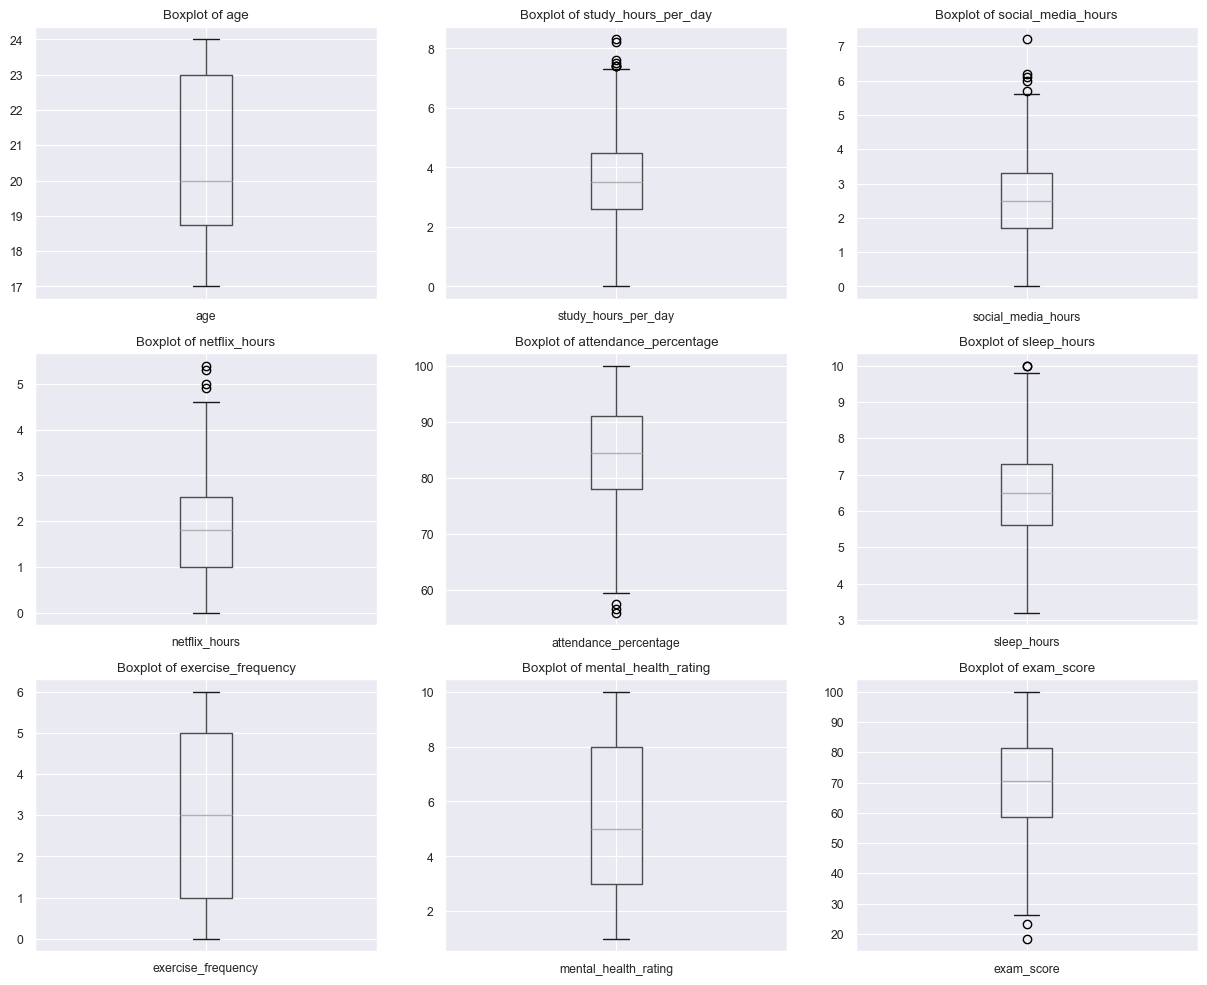

In [9]:
n_cols = 3
n_total = len(df_nums.columns)
n_rows = math.ceil(n_total/n_cols)
# create boxplots for each numeric column
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4*n_rows))
axes = axes.flatten()

for i, col in enumerate(df_nums.columns):
    df_nums.boxplot(column=col, ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')
    
plt.show()

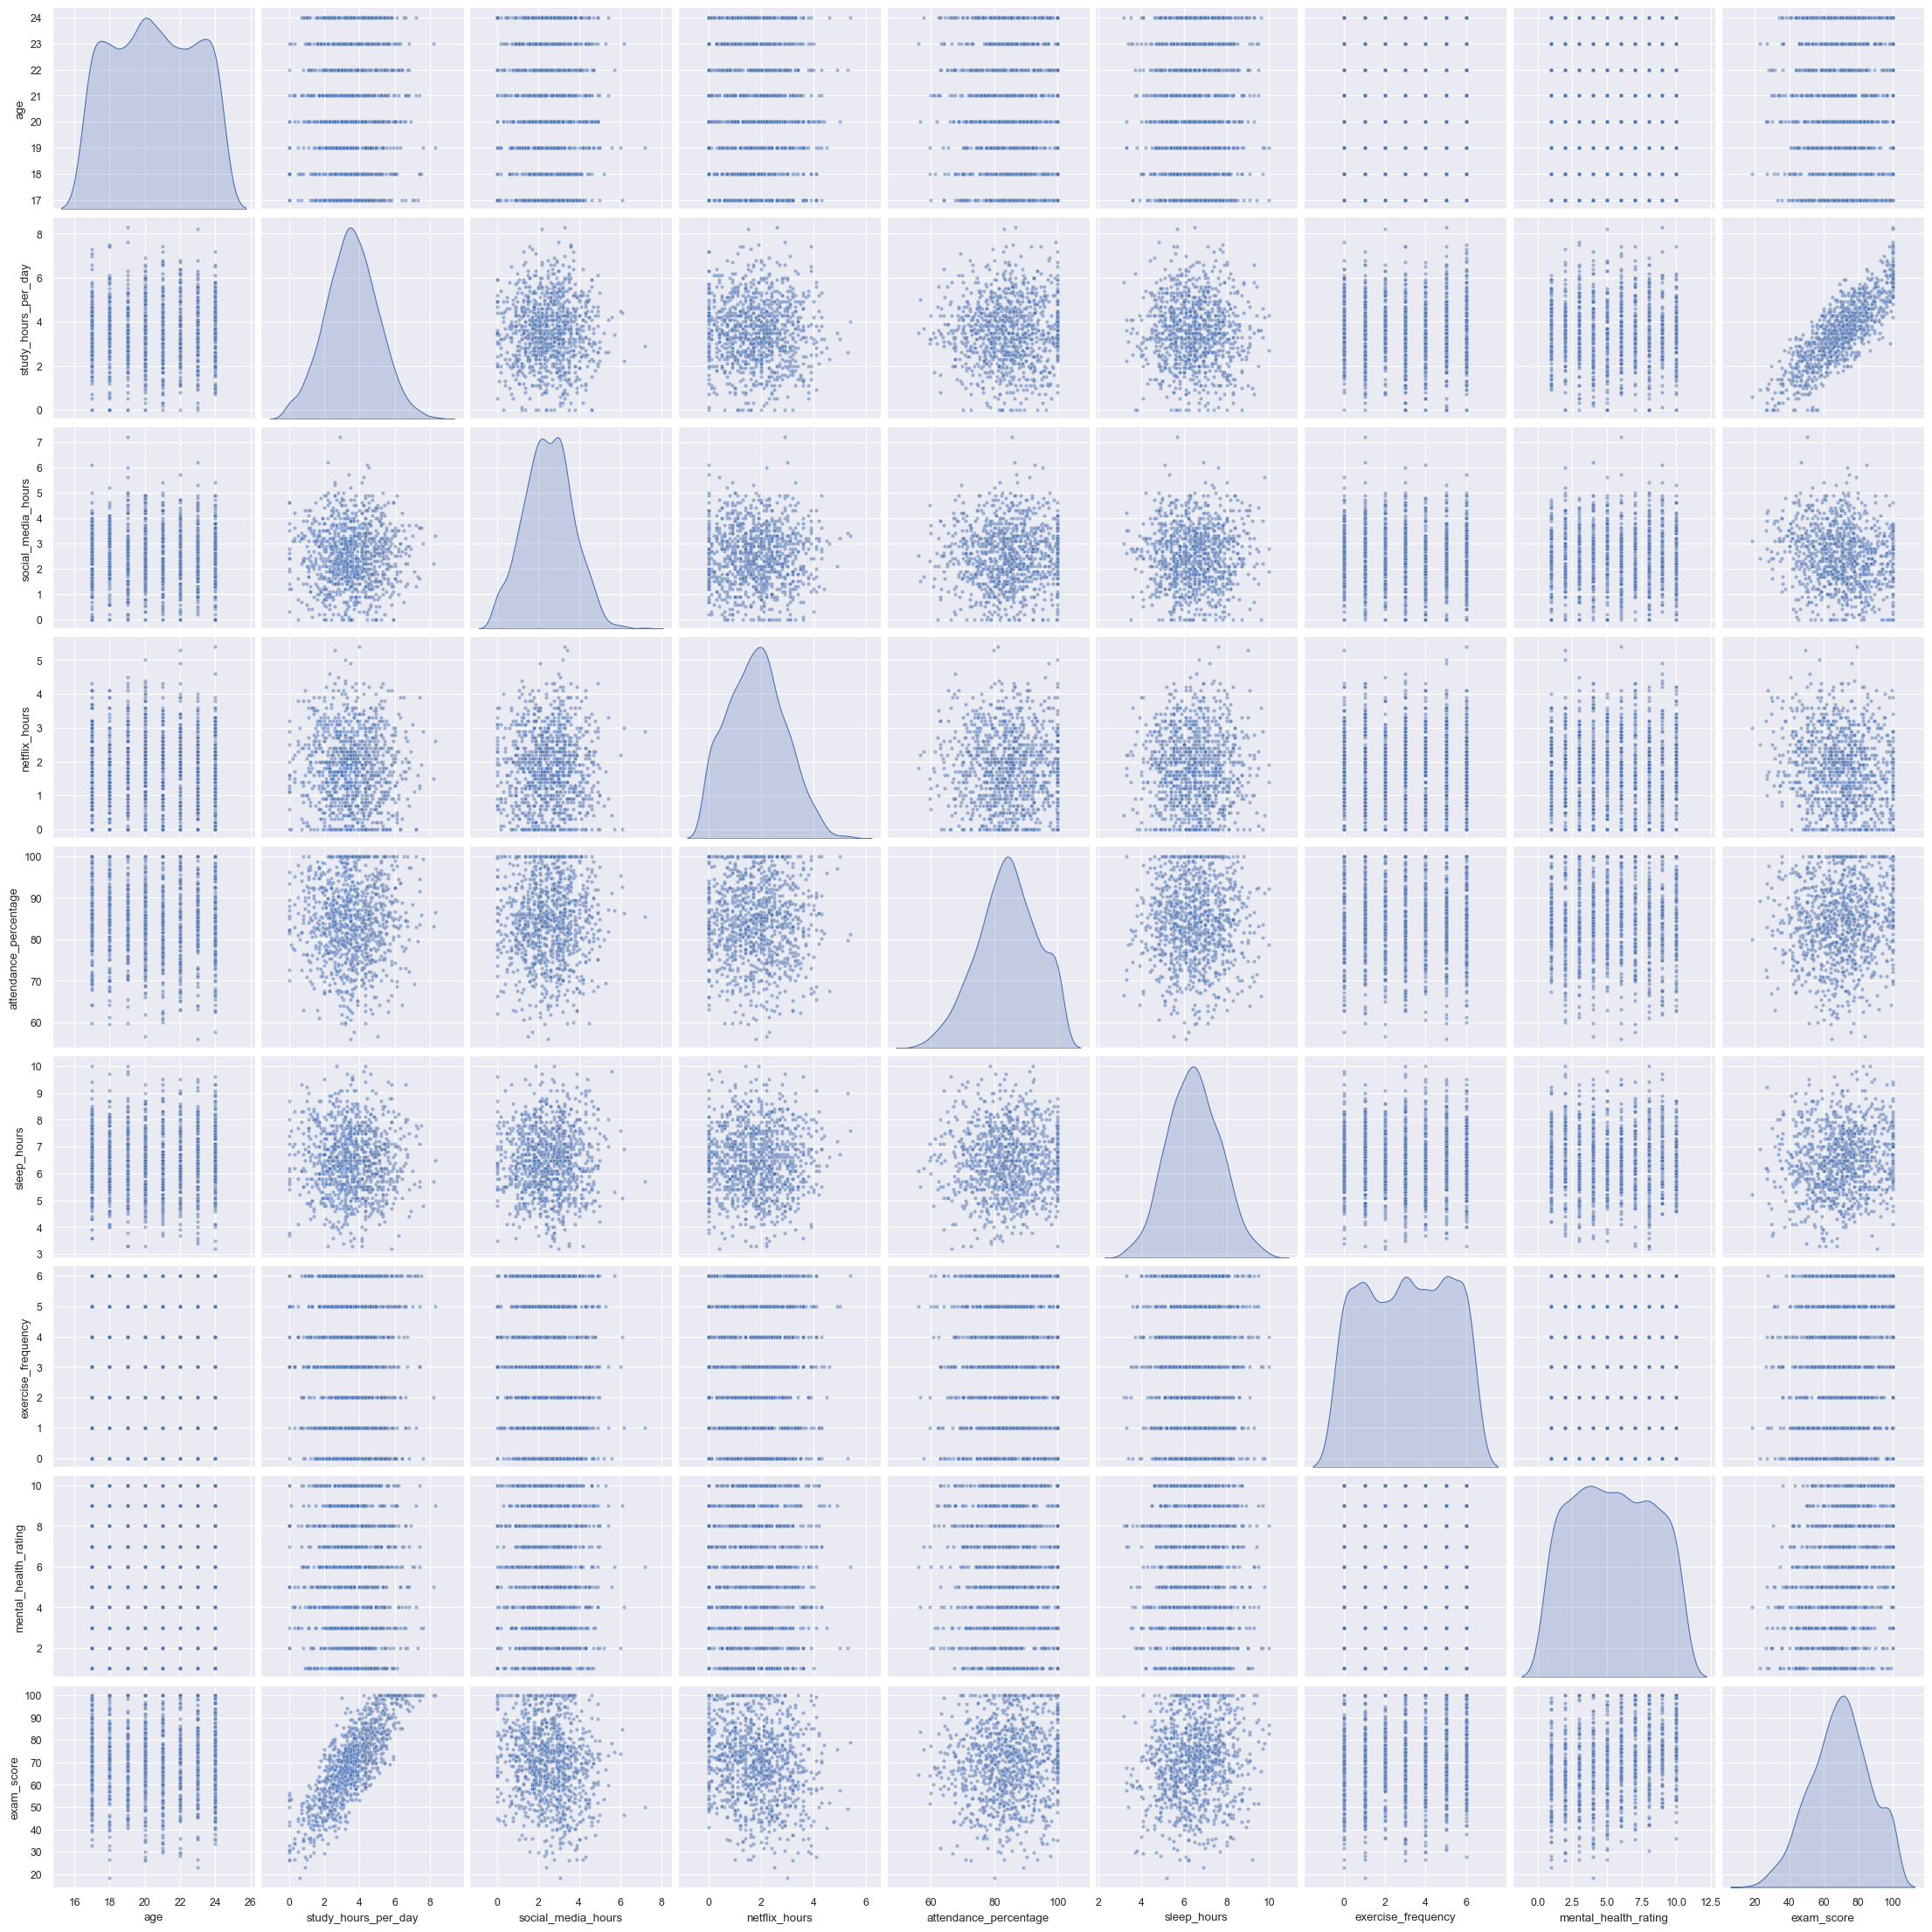

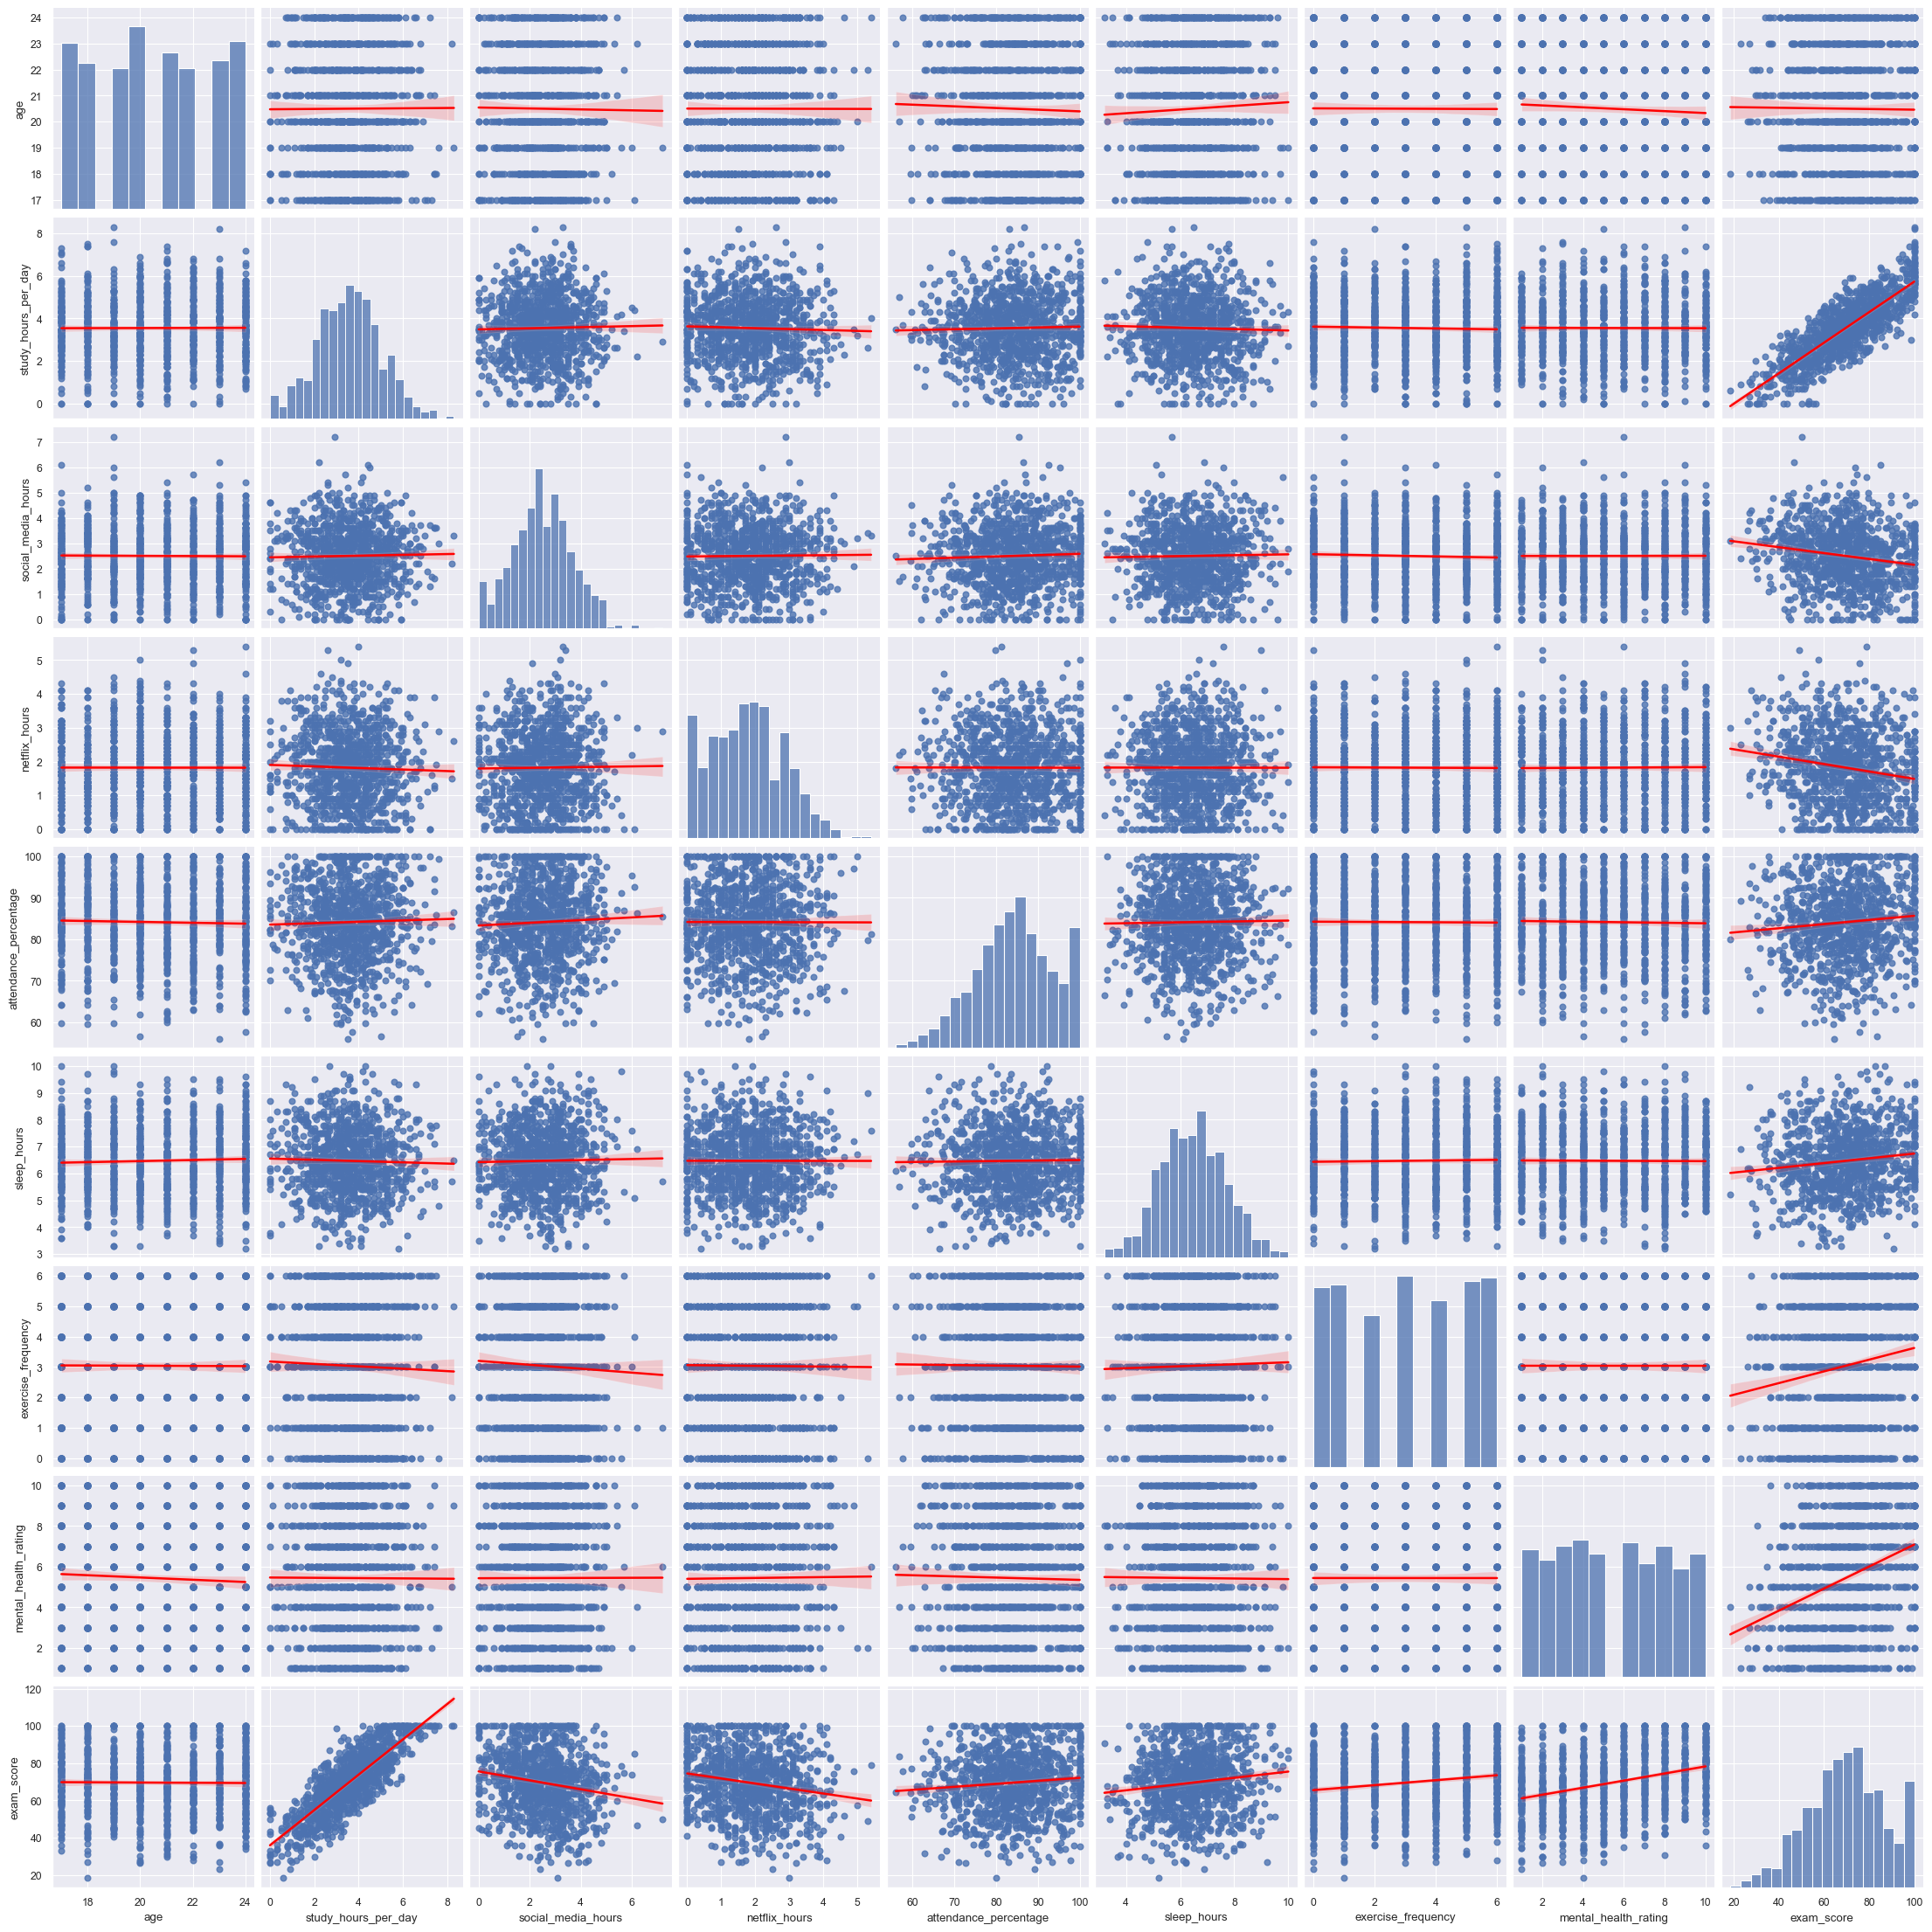

In [ ]:
# create pairplot for numeric columns
sns.pairplot(df_nums, diag_kind='kde', plot_kws={'alpha':0.5, 's':10})
plt.show()

sns.pairplot(df_nums, kind='reg', plot_kws={'line_kws':{'color':'red'}})
plt.show()

### Strongest Correlations for Numerical Features

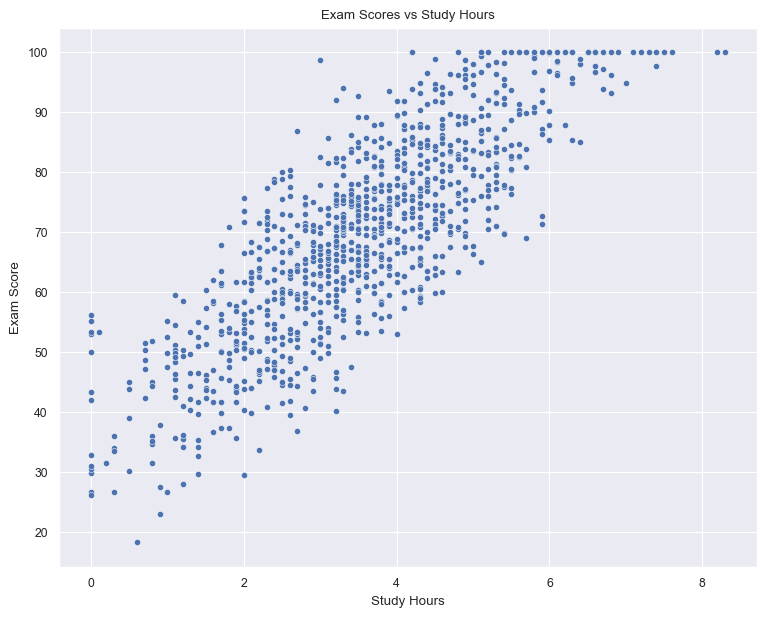

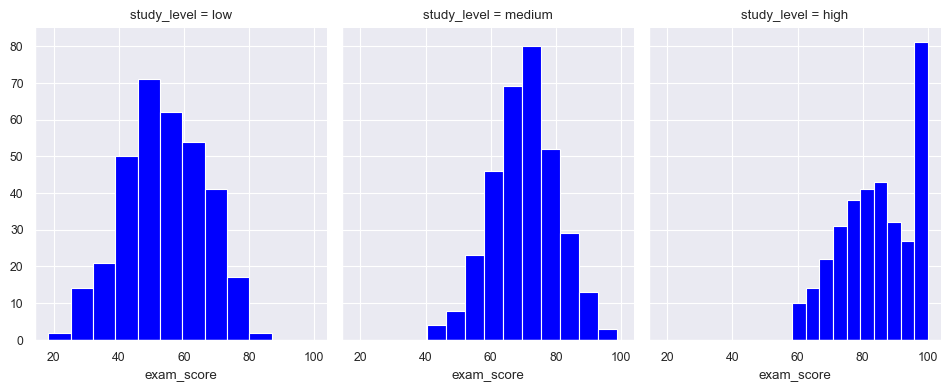

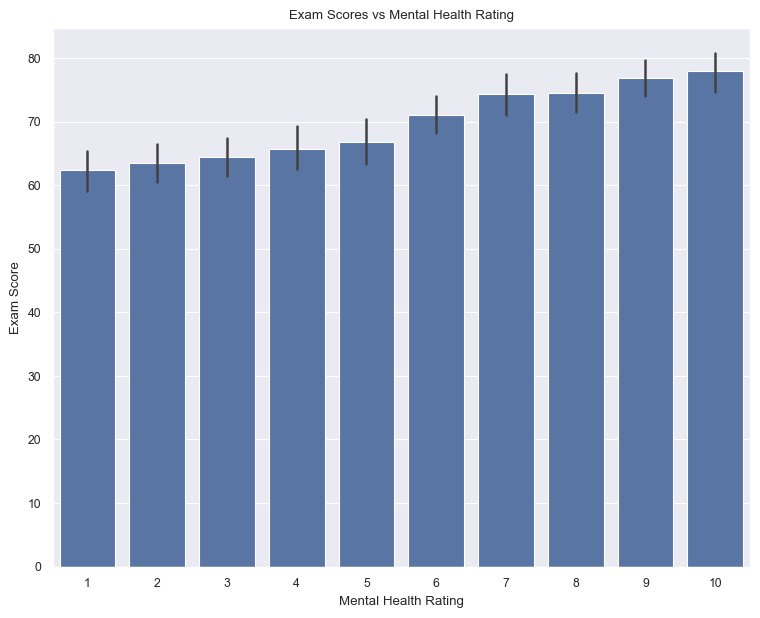

In [14]:
# study_hours_per_day shows a strong correlation with scores.
sns.scatterplot(x='study_hours_per_day', y='exam_score', data=df, s=20)
plt.title('Exam Scores vs Study Hours')
plt.xlabel('Study Hours')
plt.ylabel('Exam Score')
plt.show()

# If we were to break study hours into levels, how might the scoring be distributed?
quantiles = df['study_hours_per_day'].quantile([0,0.33,0.66,1])
df['study_level']=pd.cut(df['study_hours_per_day'], 	include_lowest=True, bins=quantiles, labels=['low', 'medium', 'high'])

# check the distribution of exam scores by study level
g=sns.FacetGrid(df, col='study_level', height=4, aspect=0.8)
g.map(plt.hist, 'exam_score', color='blue')
plt.show()

# mental_health_rating is numeric but discrete categories. also indicates a strong correlation with scores.
sns.barplot(x='mental_health_rating', y='exam_score', data=df)
plt.title('Exam Scores vs Mental Health Rating')
plt.xlabel('Mental Health Rating')
plt.ylabel('Exam Score')
plt.show()



### Negative Correlations with Numerical Features

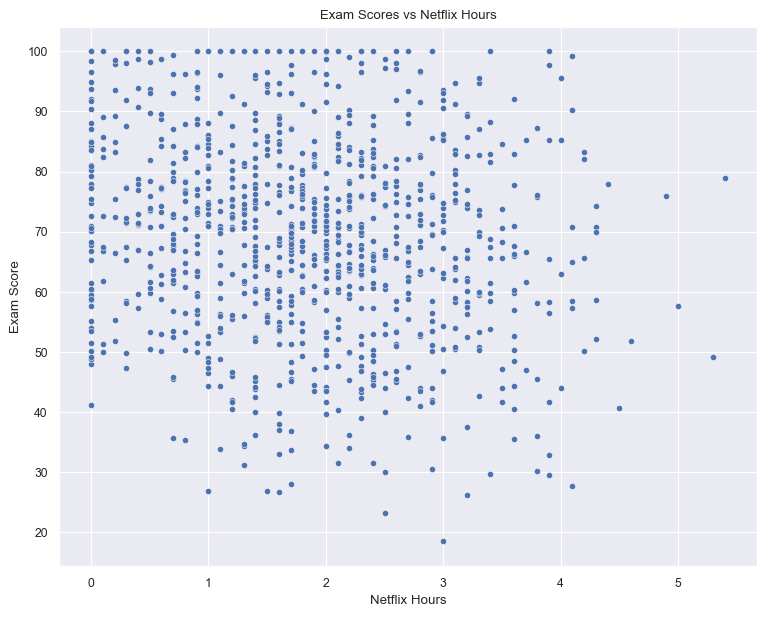

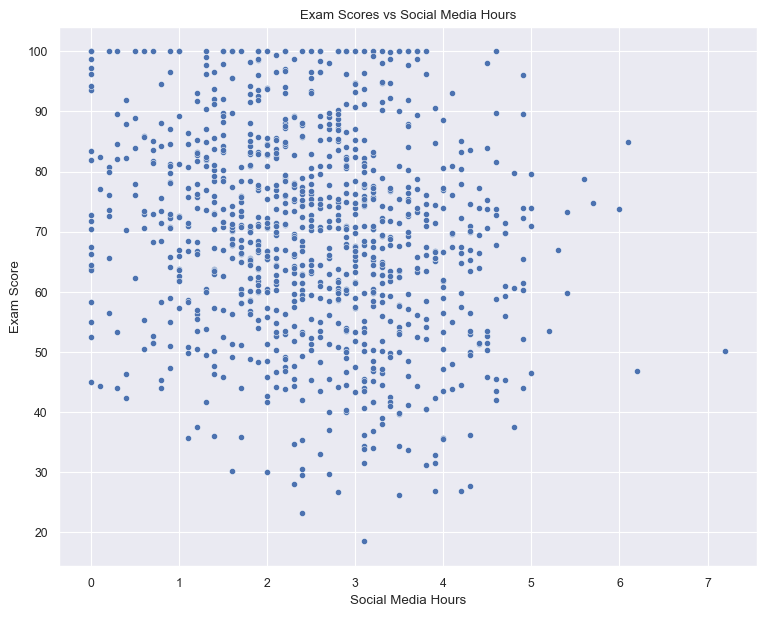

In [22]:
# slight negative correlation between netflix_hours and exam_scores.
sns.scatterplot(x='netflix_hours', y='exam_score', data=df, s=20)
plt.title('Exam Scores vs Netflix Hours')
plt.xlabel('Netflix Hours')
plt.ylabel('Exam Score')
plt.show()


# slight negative correlation betweeen social_media_hours and exam_scores.
sns.scatterplot(x='social_media_hours', y='exam_score', data=df, s=20)
plt.title('Exam Scores vs Social Media Hours')
plt.xlabel('Social Media Hours')
plt.ylabel('Exam Score')
plt.show()

## Understanding the Categorical Data

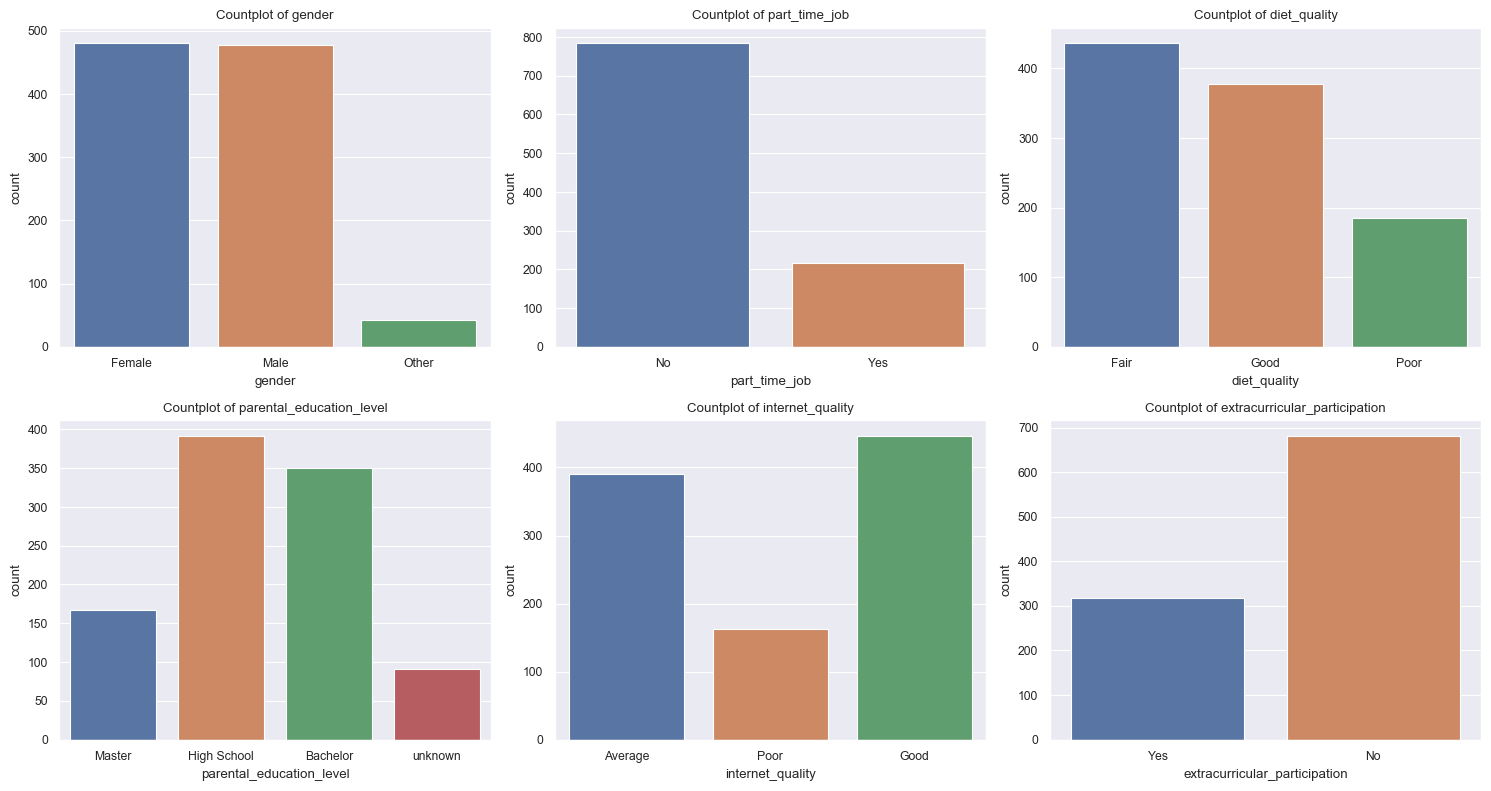

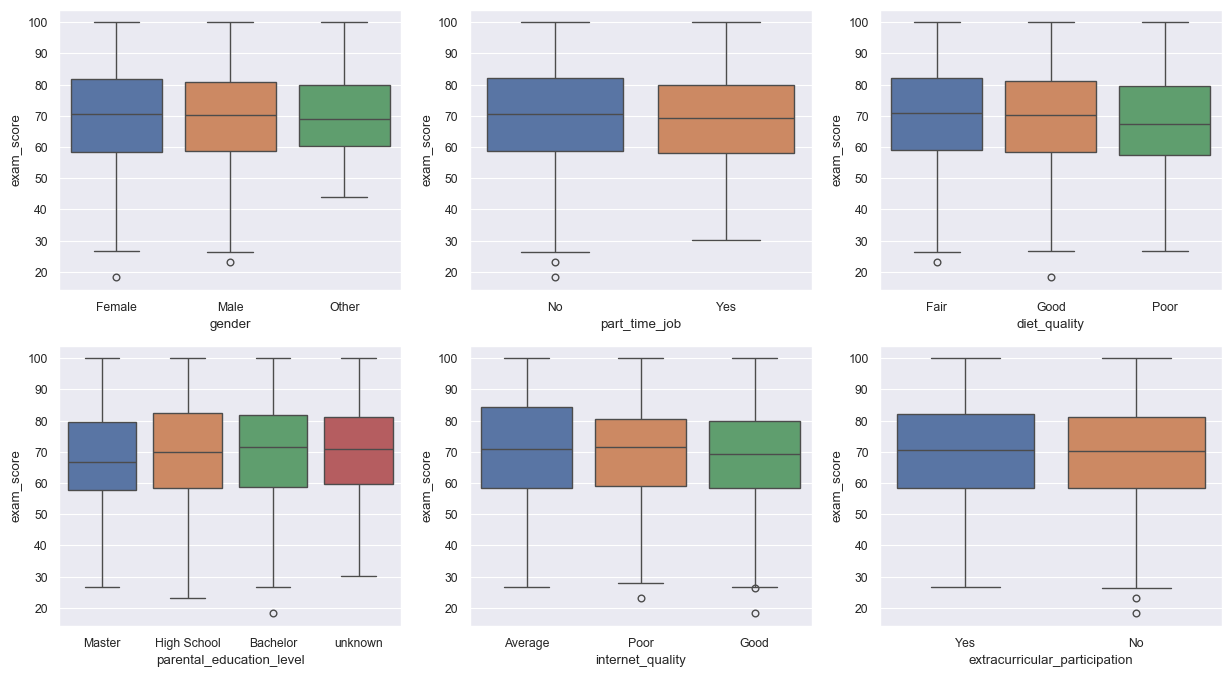

In [ ]:

# Cateogrical Column Analysis
n_cols = 3
n_total = len(df_cats.columns)
n_rows = math.ceil(n_total/n_cols)

# create countplots for each categorical feature
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4*n_rows))
axes = axes.flatten()

for i, col in enumerate(df_cats.columns):
    sns.countplot(data=df_cats, x=col, hue=col, ax=axes[i])
    axes[i].set_title(f'Countplot of {col}')
    axes[i].tick_params(axis='x', rotation=0)

for ax in axes[n_total:]:
    ax.set_visible(False)  # Hide any unused subplots

plt.tight_layout()
plt.show()

# Boxplots for categorical columns against exam scores to help visualize the relationship bewteen categorical variables and exam scores.
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4*n_rows))
axes = axes.flatten()

for i, col in enumerate(df_cats.columns):
    sns.boxplot(data=df, x=col, y='exam_score', hue=col, ax=axes[i])
    axes[i].tick_params(axis='x', rotation=0)

## Discovering Numerical/Categorical Relationships

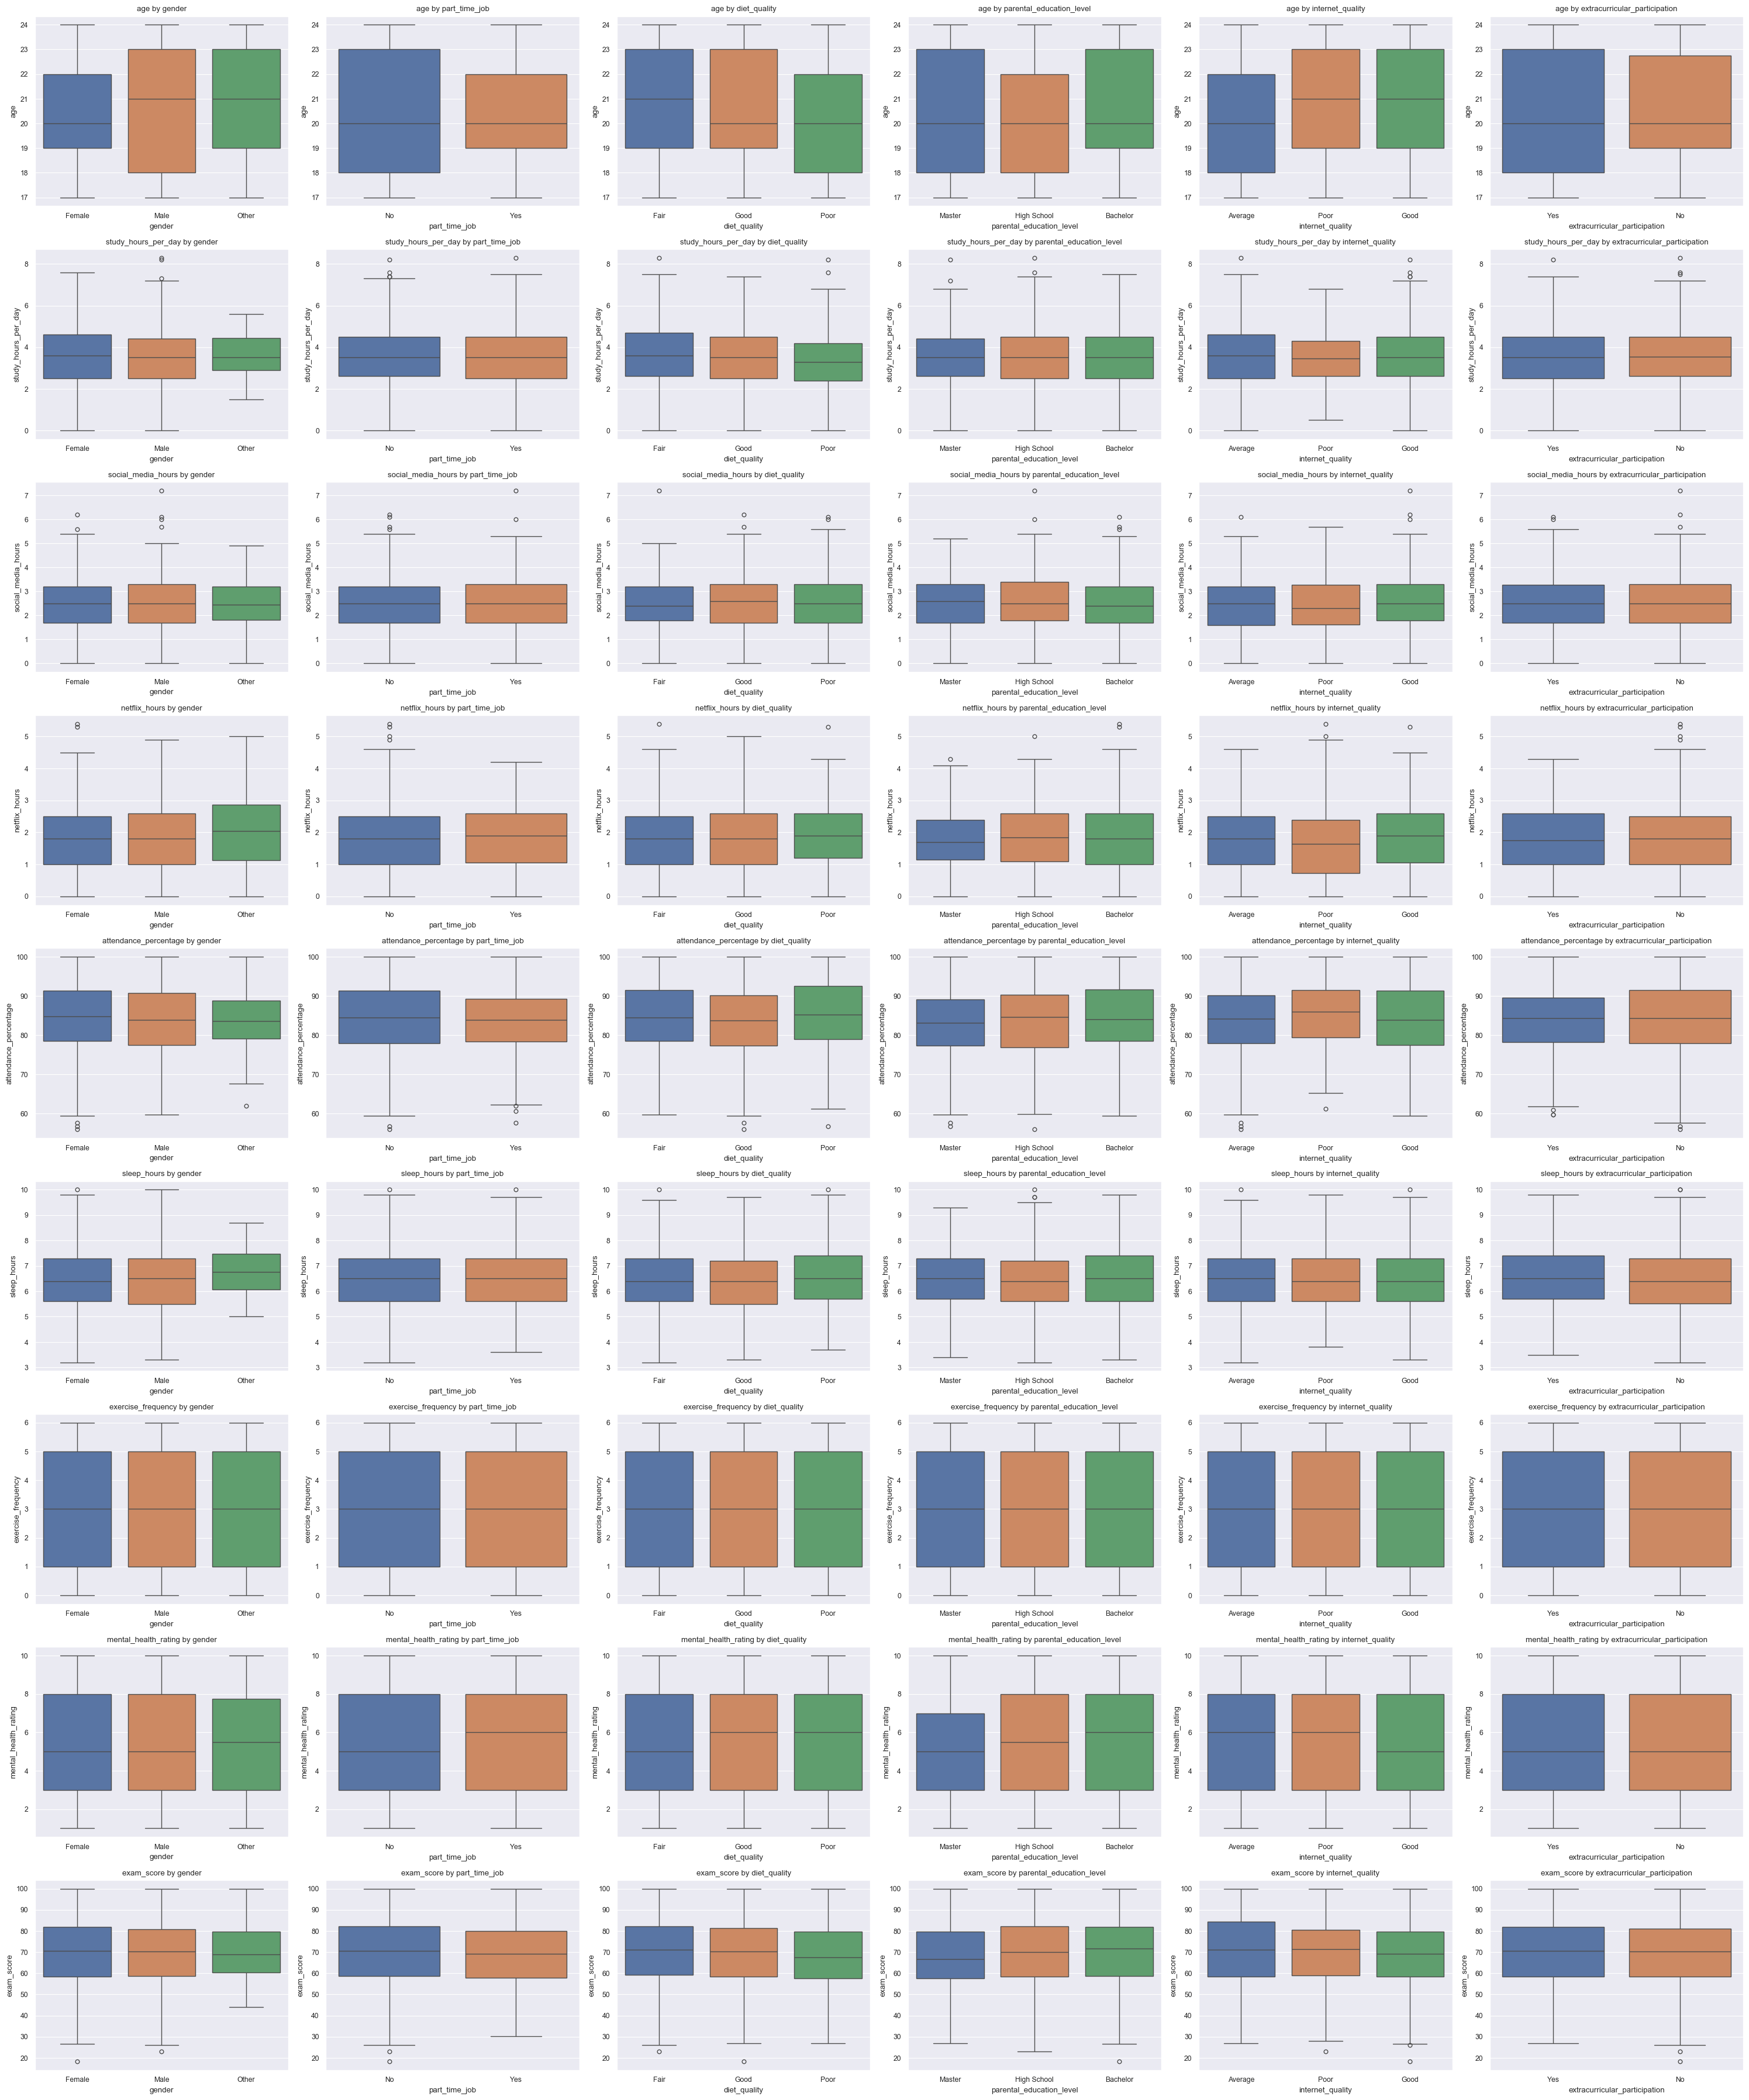

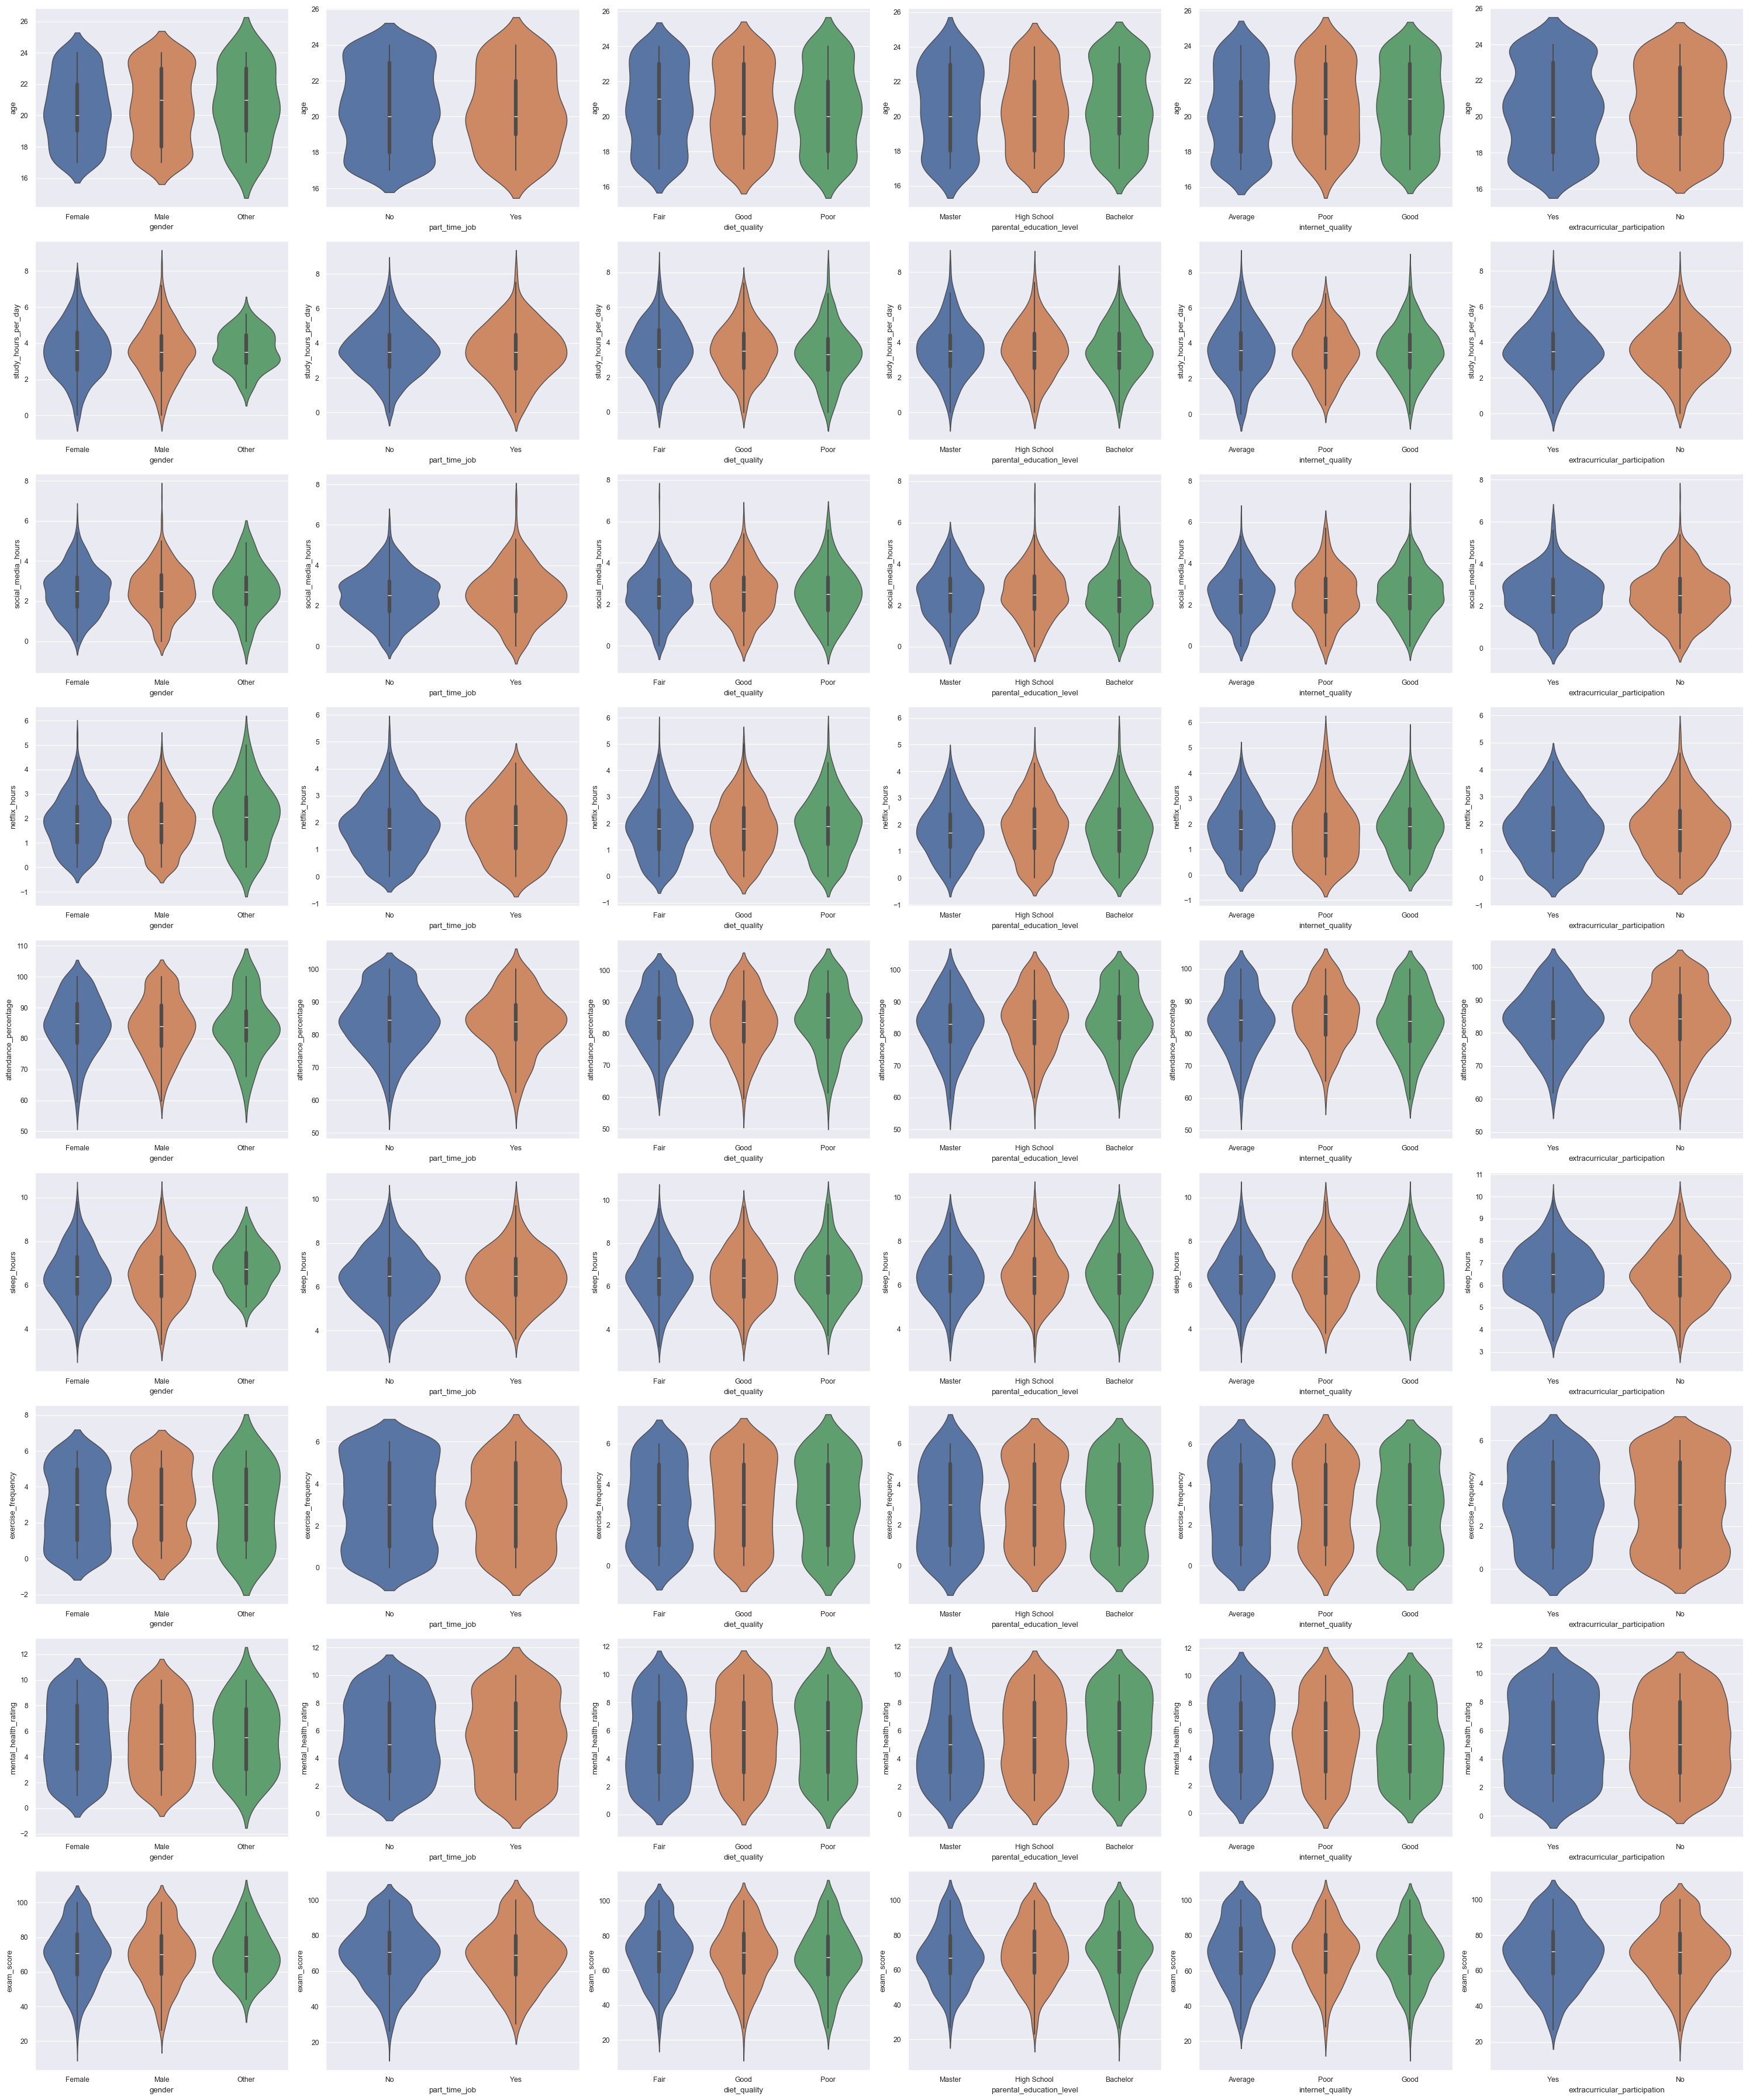

In [66]:

num_cols = df_nums.columns
cat_cols = df_cats.columns

fig, axes = plt.subplots(len(num_cols), len(cat_cols), figsize=(5*len(cat_cols), 4*len(num_cols)))

for i, num in enumerate(num_cols):
    for j, cat in enumerate(cat_cols):
        ax = axes[i, j]
        sns.boxplot(x=df[cat], y=df[num], hue=df[cat], ax=ax, legend=False)
        ax.set_title(f"{num} by {cat}")
        ax.set_xlabel(cat)
        ax.set_ylabel(num)
        

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(len(num_cols), len(cat_cols), figsize=(5*len(cat_cols), 4*len(num_cols)))

for i, num in enumerate(num_cols):
    for j, cat in enumerate(cat_cols):
        sns.violinplot(x=df[cat], y=df[num], hue=df[cat], ax=axes[i, j], legend=False)
        
        
        
plt.tight_layout()
plt.show()

## Correlation Analysis

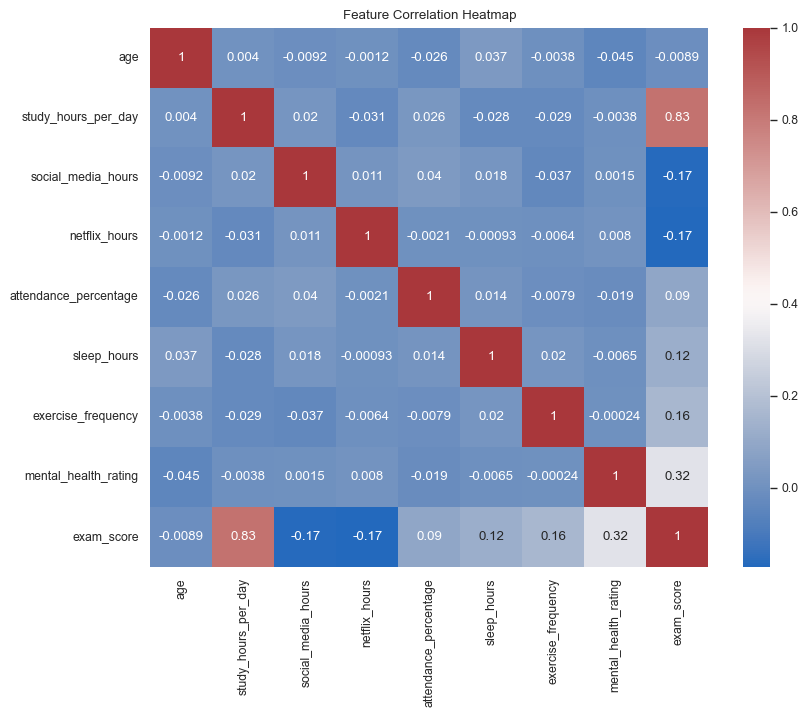

In [68]:
corr = df[num_cols].corr()
corr['exam_score'].sort_values(ascending=False)
plt.figure()
sns.heatmap(corr, cmap="vlag", annot=True)
plt.title("Feature Correlation Heatmap")
plt.show()

## Distributions on Positive Correlation 

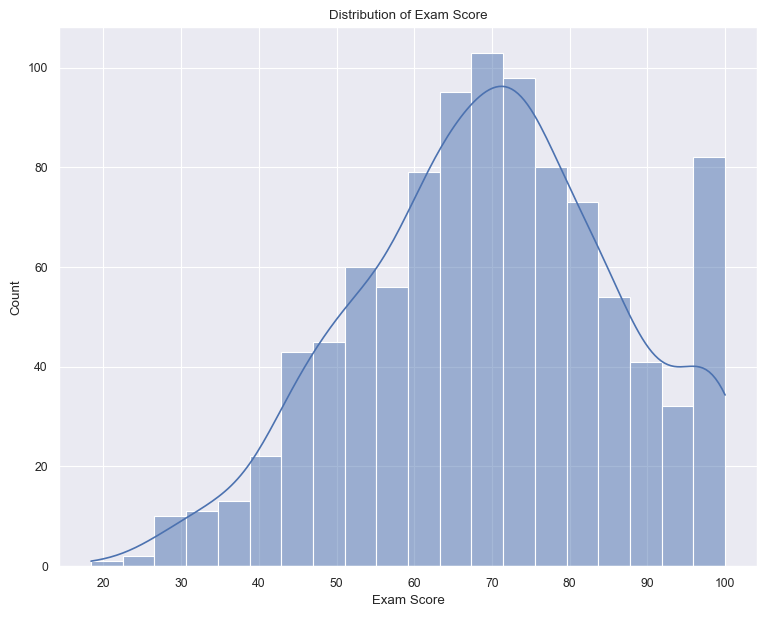

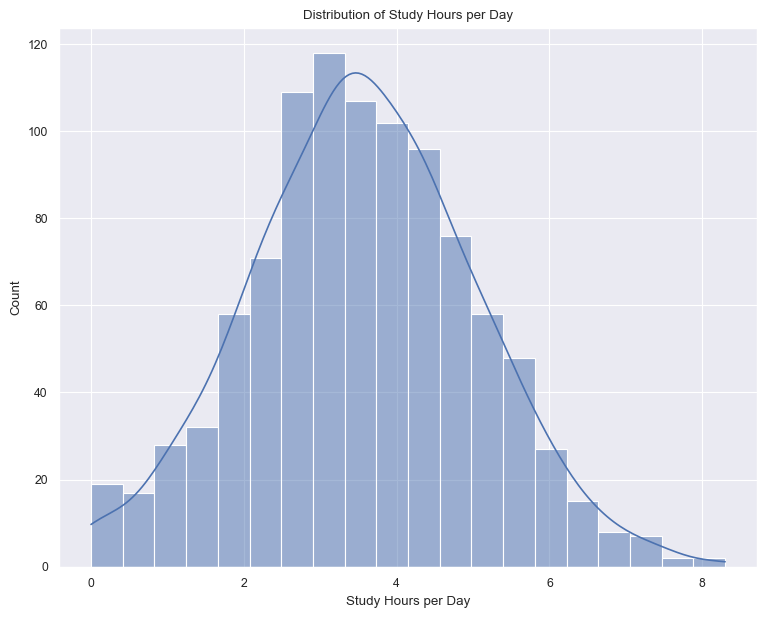

In [70]:
#Historgram: exam_score
plt.figure()
sns.histplot(df['exam_score'], bins=20, kde=True)
plt.title("Distribution of Exam Score")
plt.xlabel("Exam Score")
plt.show()

#Histogram: study_hours_per_day
plt.figure()
sns.histplot(df['study_hours_per_day'], bins=20, kde=True)
plt.title("Distribution of Study Hours per Day")
plt.xlabel("Study Hours per Day")
plt.show()

## Regression Plots on Positive correlations 

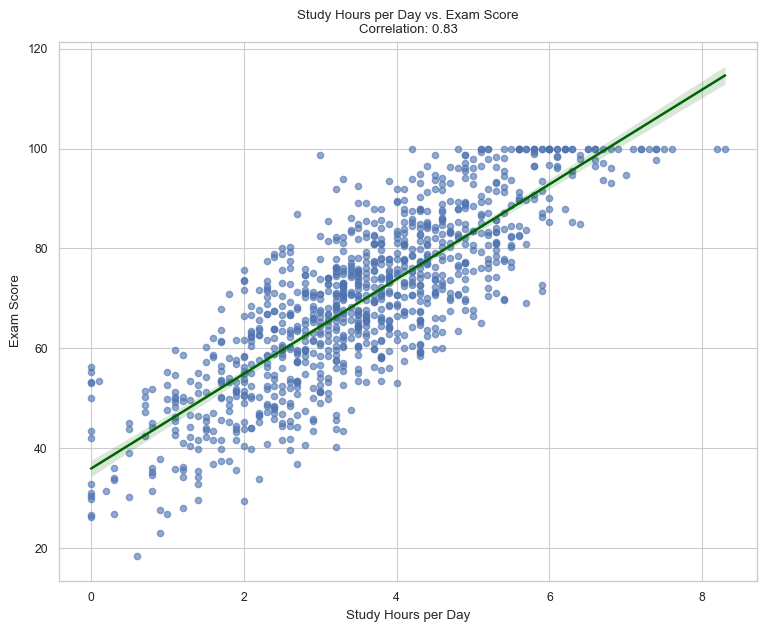

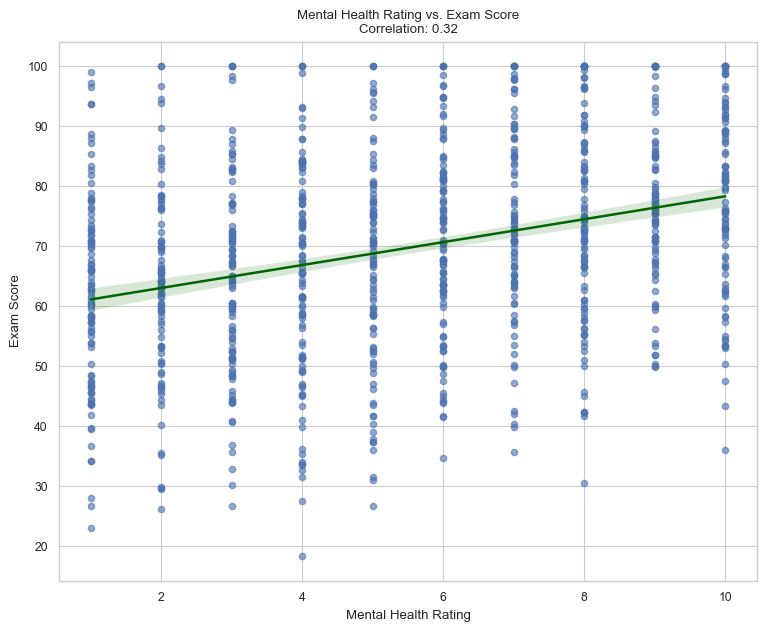

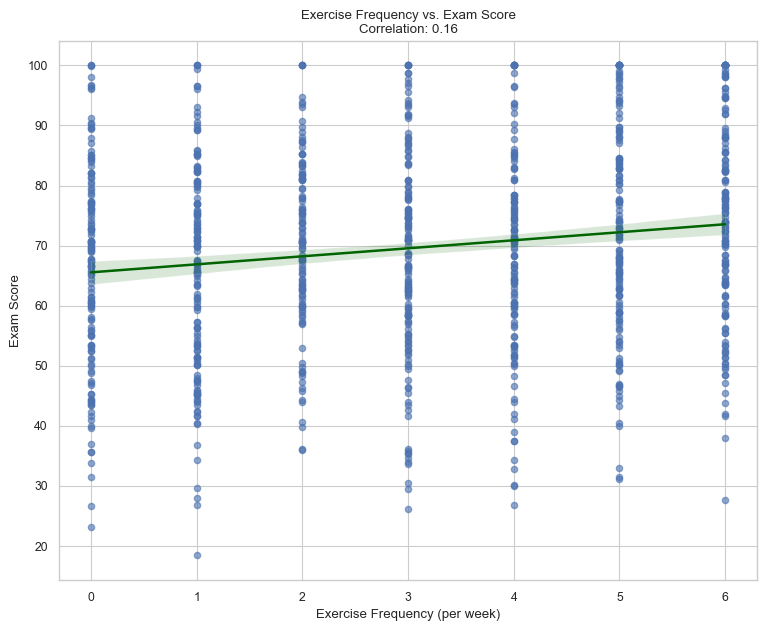

In [72]:
#Regression plot: Study Hours vs. Exam Score
sns.set_style("whitegrid")
plt.figure()
sns.regplot(x='study_hours_per_day', y='exam_score', data=df,scatter_kws={'s':20, 'alpha':0.6}, line_kws={'color':'darkgreen'})
plt.title("Study Hours per Day vs. Exam Score\nCorrelation: {:.2f}".format(corr.loc['study_hours_per_day','exam_score']))
plt.xlabel("Study Hours per Day")
plt.ylabel("Exam Score")
plt.show()

#Regression plot: Mental Health Rating vs. Exam Score
sns.set_style("whitegrid")
plt.figure()
sns.regplot(x='mental_health_rating', y='exam_score', data=df, scatter_kws={'s':20, 'alpha':0.6}, line_kws={'color':'darkgreen'})
plt.title("Mental Health Rating vs. Exam Score\nCorrelation: {:.2f}".format(corr.loc['mental_health_rating','exam_score']))
plt.xlabel("Mental Health Rating")
plt.ylabel("Exam Score")
plt.show()

#Regression plot: Exercise Frequency vs. Exam Score
plt.figure()
sns.regplot(x='exercise_frequency', y='exam_score', data=df, scatter_kws={'s':20, 'alpha':0.6}, line_kws={'color':'darkgreen'})
plt.title("Exercise Frequency vs. Exam Score\nCorrelation: {:.2f}".format(corr.loc['exercise_frequency','exam_score']))
plt.xlabel("Exercise Frequency (per week)")
plt.ylabel("Exam Score")
plt.show()

## Regression Plots on Negative Correlations 

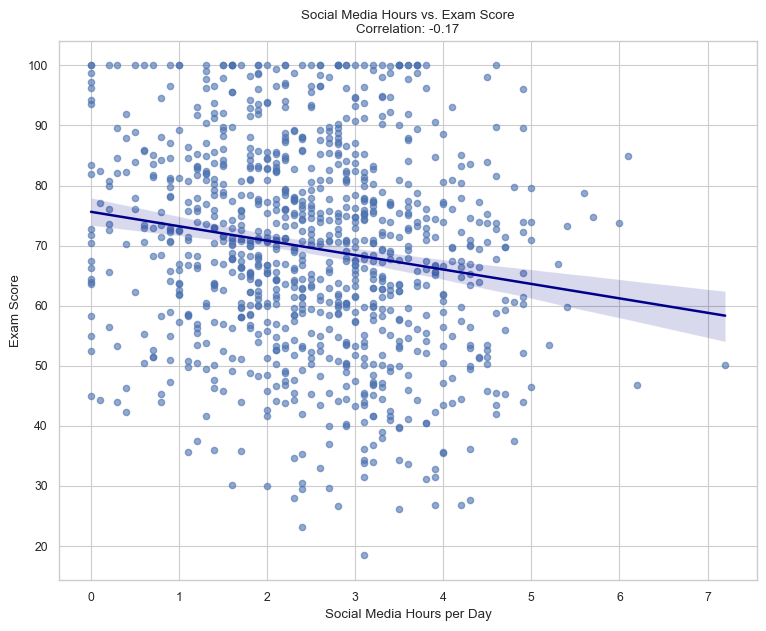

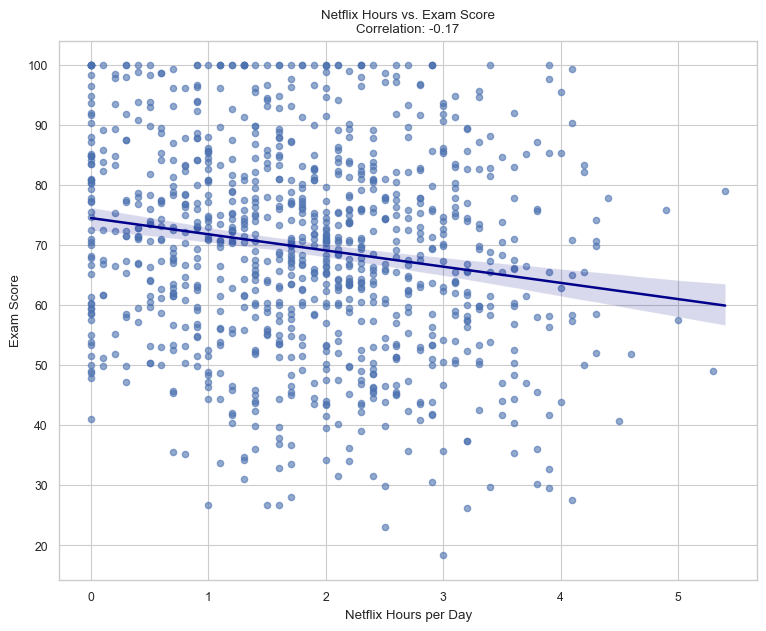

In [74]:
# Regression plot: social_media_hours vs exam_score
plt.figure()
sns.regplot(x='social_media_hours', y='exam_score', data=df, scatter_kws={'s':20, 'alpha':0.6},line_kws={'color':'darkblue'})
plt.title("Social Media Hours vs. Exam Score\nCorrelation: {:.2f}".format(corr.loc['social_media_hours','exam_score']))
plt.xlabel("Social Media Hours per Day")
plt.ylabel("Exam Score")
plt.show()

# Regression plot: netflix_hours vs exam_score
plt.figure()
sns.regplot(x='netflix_hours', y='exam_score', data=df,scatter_kws={'s':20, 'alpha':0.6}, line_kws={'color':'darkblue'})
plt.title("Netflix Hours vs. Exam Score\nCorrelation: {:.2f}".format(corr.loc['netflix_hours','exam_score']))
plt.xlabel("Netflix Hours per Day")
plt.ylabel("Exam Score")
plt.show()


## Group Comparisons

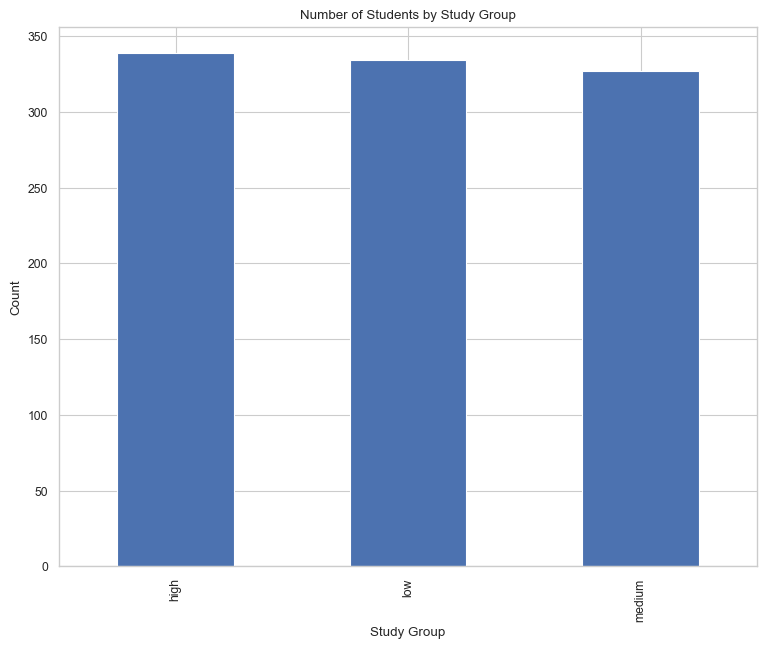

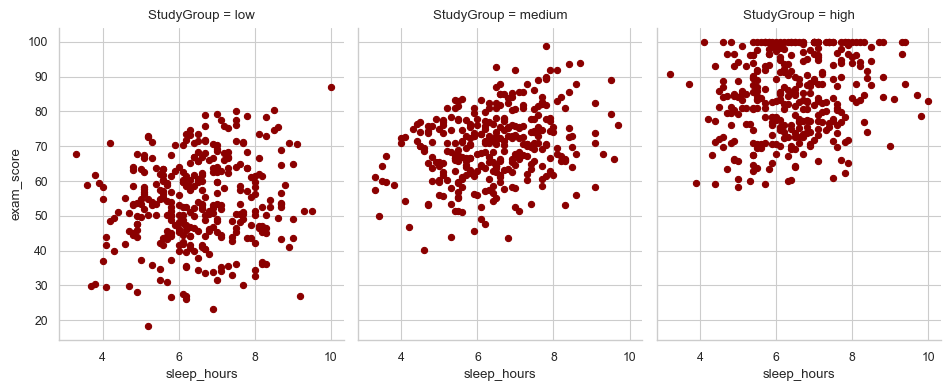

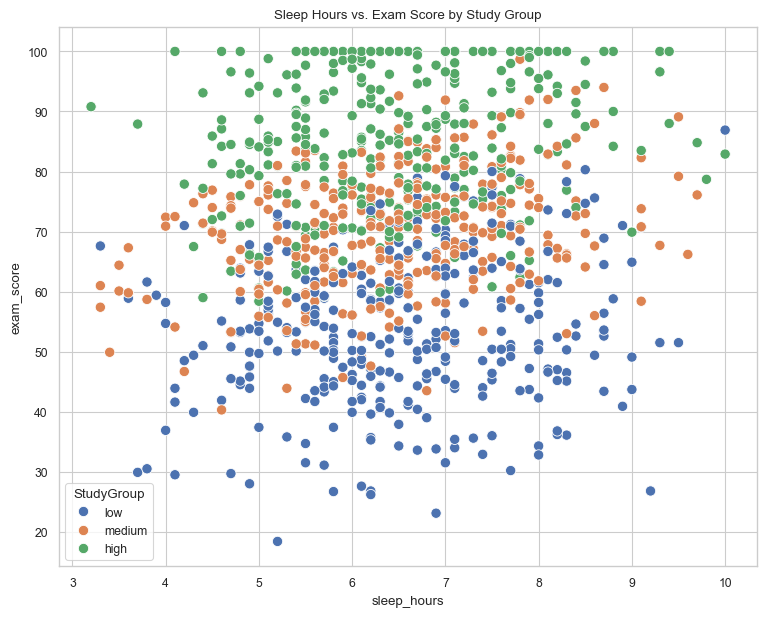

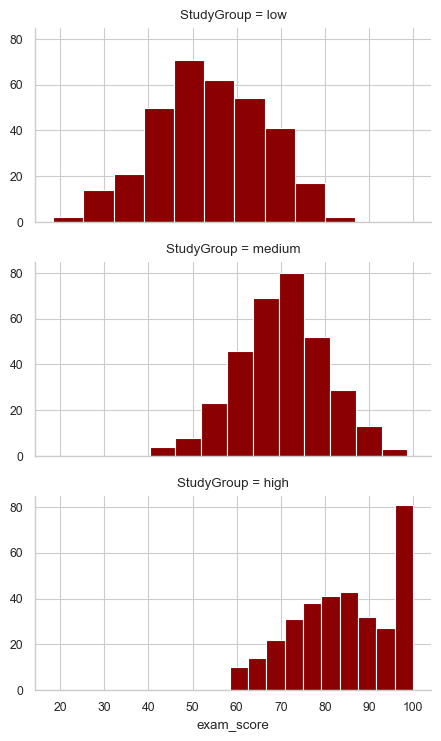

In [76]:
breaks = df['study_hours_per_day'].quantile([0, 0.33, 0.66, 1.0])
df['StudyGroup'] = pd.cut(df['study_hours_per_day'], include_lowest=True, bins=breaks, labels=['low', 'medium', 'high'])

#Bar chart of counts by StudyGroup
sns.set_style("whitegrid")
df['StudyGroup'].value_counts().plot.bar()
plt.title("Number of Students by Study Group")
plt.xlabel("Study Group")
plt.ylabel("Count")
plt.show()

#Faceted scatter: sleep_hours vs. exam_score by StudyGroup
sns.set_style("whitegrid")
g = sns.FacetGrid(df, col='StudyGroup', col_order=['low', 'medium', 'high'], height=4, aspect=0.8)
g.map(plt.scatter, 'sleep_hours', 'exam_score', s=20, color='darkred')
plt.show()

#Scatterplot with hue by StudyGroup
sns.set_style("whitegrid")
sns.scatterplot(x='sleep_hours',y='exam_score',data=df, hue='StudyGroup', s=55)
plt.title("Sleep Hours vs. Exam Score by Study Group")
plt.show()


#Histograms of exam_score by StudyGroup
sns.set_style("whitegrid")
g = sns.FacetGrid(df, row='StudyGroup', height=2.5, aspect=1.8)
g.map(plt.hist, 'exam_score', color="darkred")
plt.show()

## kNN Regression 

In [94]:
features = ['study_hours_per_day', 'mental_health_rating', 'exercise_frequency' ]

X = df[features].values
y = df['exam_score'].values

#split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

#scale
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)


for k in [3,5,7]:
    regr = KNeighborsRegressor(n_neighbors=k)
    regr.fit(X_train, y_train)
    preds = regr.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    print(f"k={k} RMSE: {rmse:.2f}")

#Blind MSE using y_train
blind_pred = y_train.mean()
mse_blind = mean_squared_error(y_test, [blind_pred]*len(y_test))
print(f'Blind MSE:  {mse_blind:.0f}')
rmse_blind = np.sqrt(mse_blind)
print("Blind RMSE: {:.2f}".format(rmse_blind))

regr = KNeighborsRegressor(n_neighbors=7)
regr.fit(X_train, y_train)

#predictions 
predictions = regr.predict(X_test)

k=3 RMSE: 8.29
k=5 RMSE: 7.68
k=7 RMSE: 7.37
Blind MSE:  279
Blind RMSE: 16.69


## Anomaly Detection (Positive Features)

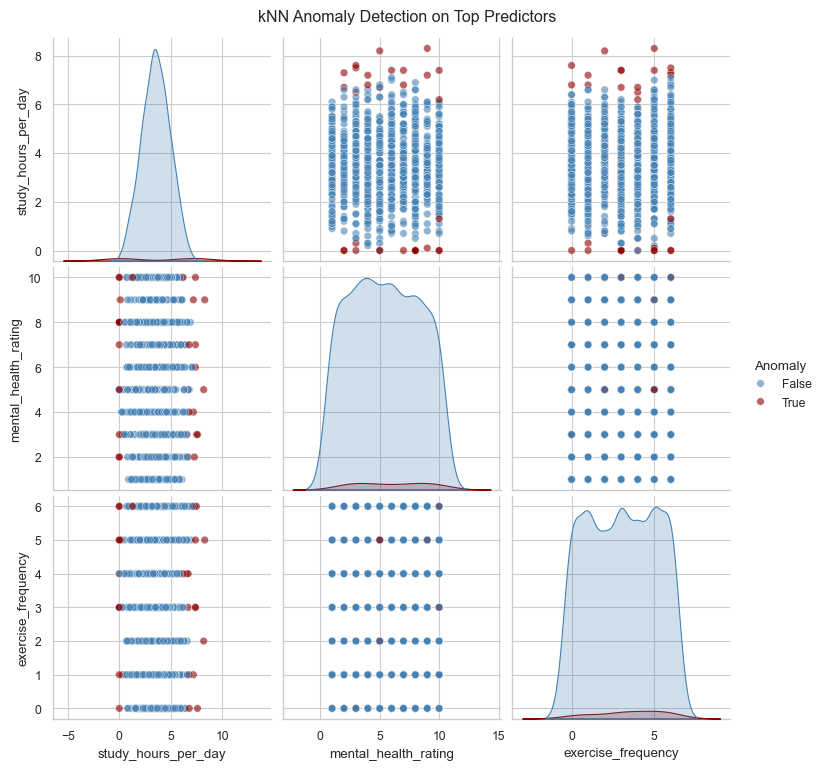

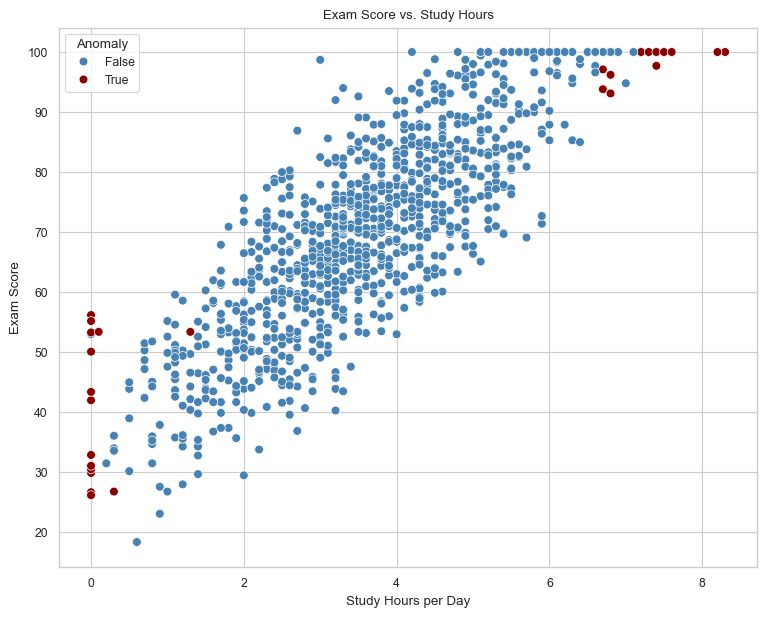

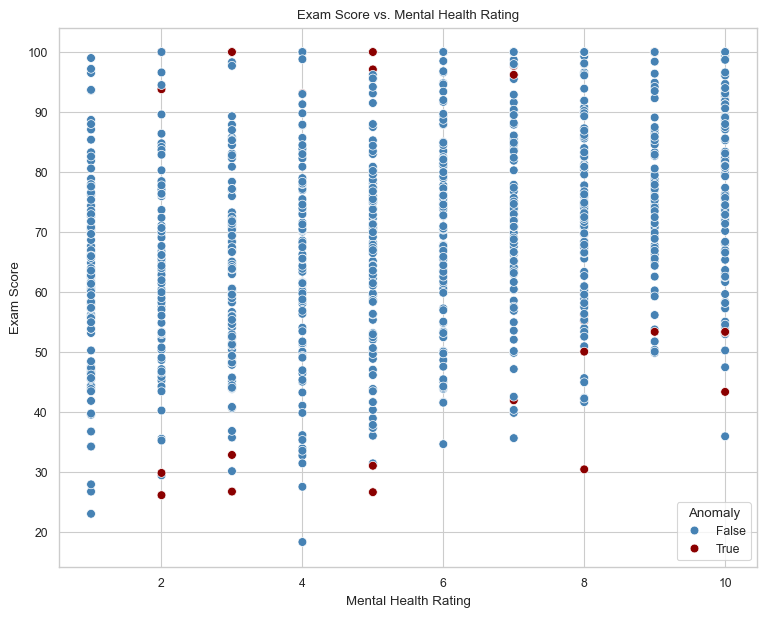

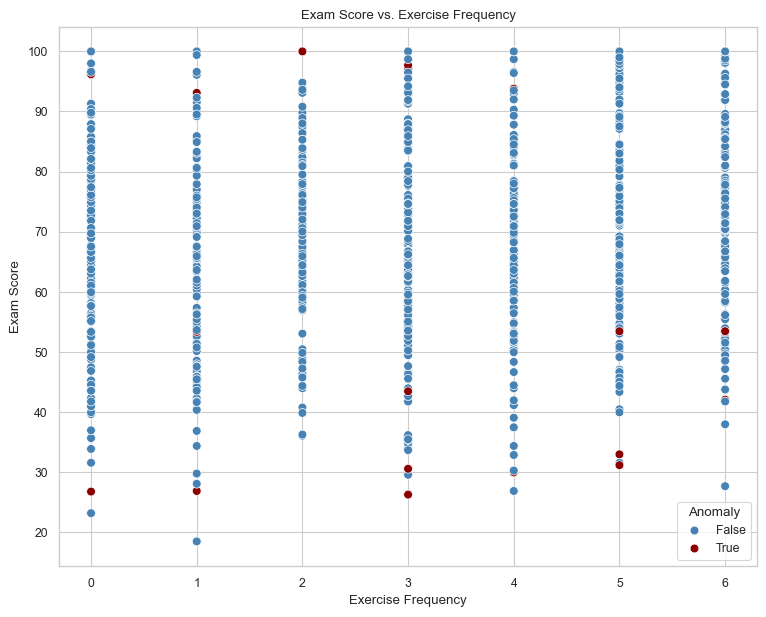

In [96]:
def edist(x, y):
    return np.sqrt(np.sum((x-y)**2))

def dist(x):
    m = x.shape[0]
    dm = np.zeros((m, m))
    for i in range(m):
        for j in range(i, m):
            dm[i, j] = edist(x[i], x[j])
            dm[j, i] = dm[i, j]
    return dm

def knn_anomalies(df, k=7, threshold=2.5):
    # scale the data and compute distance matrix
    x = df.apply(zscore).values
    dm = dist(x)
    
    m = x.shape[0]
    k_distances = np.zeros(m)
    
    for i in range(m):
        row = dm[i, :]
        row_sorted = np.sort(row)
        k_distances[i] = row_sorted[k]
    
    kd_zscores = zscore(k_distances)
    
    anomaly_idxs = np.where(kd_zscores > threshold)[0]
    return anomaly_idxs

anoms = knn_anomalies(df[features], k=7, threshold=2.5)

#Add a new 'Anomaly' column to the main df
x = np.full(len(df), False)
x[anoms] = True
df['Anomaly'] = x

df_anom = df[features].copy()
df_anom['Anomaly'] = df['Anomaly']

#Plot all anomalies
sns.pairplot(df_anom, vars=features, hue='Anomaly', diag_kind='kde', palette={False: 'steelblue', True: 'darkred'}, plot_kws={'s':30, 'alpha':0.6})
plt.suptitle("kNN Anomaly Detection on Top Predictors", y=1.02)
plt.show()

#Scatter: Study Hours vs. Exam Score
plt.figure()
sns.scatterplot(x='study_hours_per_day',y='exam_score',data=df,hue='Anomaly',palette={False: 'steelblue', True: 'darkred'},s=40)
plt.title("Exam Score vs. Study Hours")
plt.xlabel("Study Hours per Day")
plt.ylabel("Exam Score")
plt.legend(title='Anomaly', loc='best')
plt.show()

# Mental Health vs. Exam Score
plt.figure()
sns.scatterplot(x='mental_health_rating',y='exam_score',data=df,hue='Anomaly',palette={False: 'steelblue', True: 'darkred'},s=40)
plt.title("Exam Score vs. Mental Health Rating")
plt.xlabel("Mental Health Rating")
plt.ylabel("Exam Score")
plt.legend(title='Anomaly', loc='best')
plt.show()

# Exercise Frequency vs. Exam Score
plt.figure()
sns.scatterplot(x='exercise_frequency',y='exam_score',data=df,hue='Anomaly',palette={False: 'steelblue', True: 'darkred'},s=40)
plt.title("Exam Score vs. Exercise Frequency")
plt.xlabel("Exercise Frequency")
plt.ylabel("Exam Score")
plt.legend(title='Anomaly', loc='best')
plt.show()

## Anomaly Detection (Negative Features)

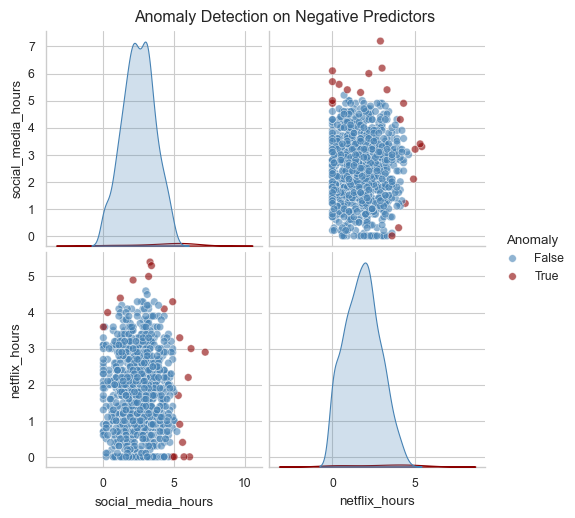

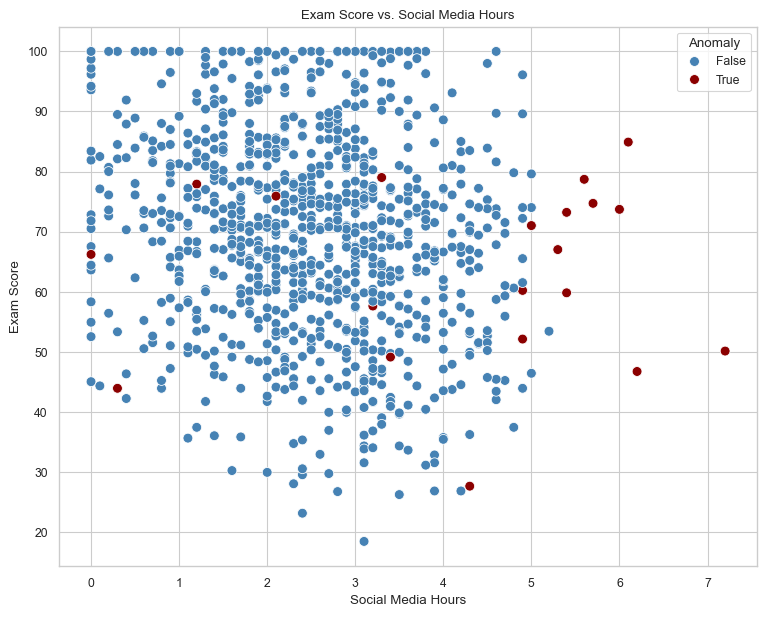

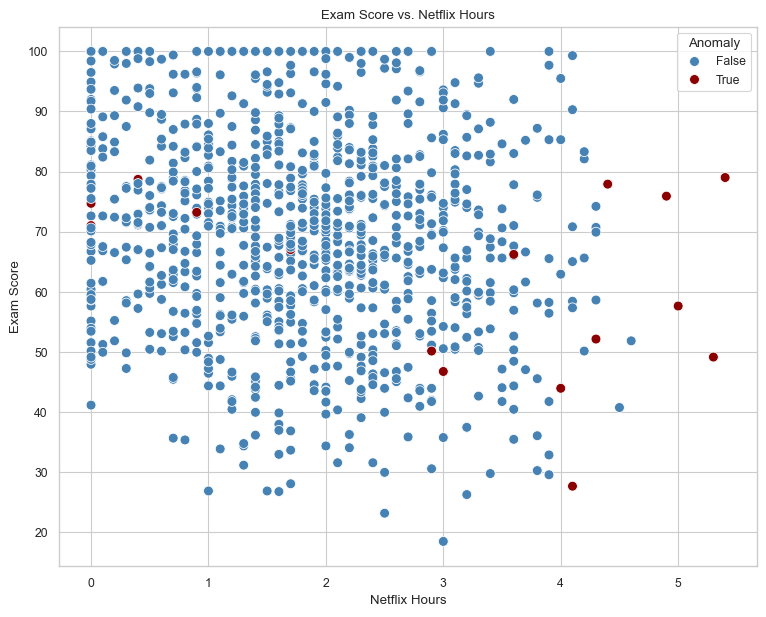

In [98]:
features_neg = ['social_media_hours', 'netflix_hours']
df_anom_neg = df[features_neg].copy()
df_scaled_neg = df_anom_neg.apply(zscore)

anoms_neg = knn_anomalies(df_scaled_neg, k=7, threshold=2.5)

# Mark anomalies in the main df
flags = np.full(len(df), False)
flags[anoms_neg] = True
df['Anomaly'] = flags

#Pairplot: two negative features
sns.pairplot(df_anom_neg.assign(Anomaly=flags), vars=features_neg,hue='Anomaly',diag_kind='kde', palette={False: 'steelblue', True: 'darkred'}, plot_kws={'s':30, 'alpha':0.6})
plt.suptitle("Anomaly Detection on Negative Predictors", y=1.02)
plt.show()

#Scatter: Social Media Hours vs. Exam Score
plt.figure()
sns.scatterplot(x='social_media_hours', y='exam_score',data=df,hue='Anomaly', palette={False: 'steelblue', True: 'darkred'},s=50)
plt.title("Exam Score vs. Social Media Hours")
plt.xlabel("Social Media Hours")
plt.ylabel("Exam Score")
plt.show()

#Scatter: Netflix Hours vs. Exam Score
plt.figure()
sns.scatterplot(x='netflix_hours',y='exam_score',data=df,hue='Anomaly',palette={False: 'steelblue', True: 'darkred'},s=50)
plt.title("Exam Score vs. Netflix Hours")
plt.xlabel("Netflix Hours")
plt.ylabel("Exam Score")
plt.show()

## Prediction vs. True Plot

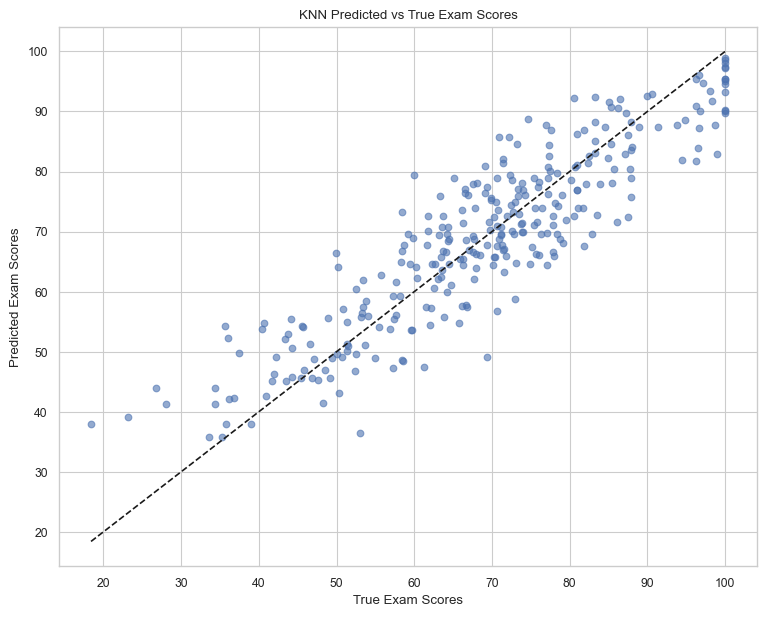

In [100]:
plt.figure()
plt.scatter(y_test, predictions, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.xlabel("True Exam Scores")
plt.ylabel("Predicted Exam Scores")
plt.title("KNN Predicted vs True Exam Scores")
plt.show()
